Project 4

## Load data in

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import geocoder
from geopy.geocoders import Nominatim as nm
import time
import geopandas as gpd
import contextily as cx
from shapely.geometry import Point
import geoplot.crs as gcrs
import geoplot as gplt
import pyproj
import seaborn as sns
import plotly.express as px

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
#Daniel, Don't read this - Jordan Kominsky 
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
df = pd.read_csv('../Data/zillow_data.csv')
df

RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO                NaN   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0           Cook         1  334200.0  335400.0  336500.0  ...  1005500   
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
3           Cook         4  498100.0  500900.0  503100.0  ...  1289800   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
...          ...       ...       ...       ...       ...  ...      ...   
14718   Franklin     14719   94600.0   94300.0   94000.0  ...   216800   
14719    Grafton     14720   92700.0   92500.0   92400.0  ...   202100   
14720    Madison     14721   57100.0   57300.0   57500.0  ...   121800   
14721   Gunnison     14722  191100.0  192400.0  193700.0  ...   662800   
14722      Clark     14723  176400.0  176300.0  176100.0  ...   333800   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
0      1007500  1007800  1009600  1013300  1018700  1024400  1030700  1033800   
1       310000   312500   314100   315000   316600   318100   319600   321100   
2       320600   320200   320400   320800   321200   321200   323000   326900   
3      1287700  1287400  1291500  1296600  1299000  1302700  1306400  1308500   
4       119400   120000   120300   120300   120300   120300   120500   121000   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14718   217700   218600   218500   218100   216400   213100   209800   209200   
14719   208400   212200   215200   214300   213100   213700   218300   222700   
14720   122800   124600   126700   128800   130600   131700   132500   133000   
14721   671200   682400   695600   695500   694700   706400   705300   681500   
14722   336400   339700   343800   346800   348900   350400   353000   356000   

       2018-04  
0      1030600  
1       321800  
2       329900  
3      1307000  
4       121500  
...        ...  
14718   209300  
14719   225800  
14720   133400  
14721   664400  
14722   357200  

[14723 rows x 272 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
df.columns[:100]

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08',
       '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02',
       '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08',
       '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02',
       '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08',
       '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02',
       '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08',
       '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02',
       '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08',
       '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02',
       '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
       '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02',
       '2002-03', '2002-04', '2002-05', '2002-06',

In [5]:
df['Geolocate'] = df['City'] + ', ' + df['State']


In [6]:
df[df.Geolocate == 'Washington, DC']

RegionID  RegionName        City State       Metro  \
29       66126       20002  Washington    DC  Washington   
33       66133       20009  Washington    DC  Washington   
181      66135       20011  Washington    DC  Washington   
246      66142       20019  Washington    DC  Washington   
258      66125       20001  Washington    DC  Washington   
402      66143       20020  Washington    DC  Washington   
1263     66132       20008  Washington    DC  Washington   
1448     66127       20003  Washington    DC  Washington   
1707     66151       20032  Washington    DC  Washington   
2066     66139       20016  Washington    DC  Washington   
2581     66134       20010  Washington    DC  Washington   
2653     66131       20007  Washington    DC  Washington   
5297     66146       20024  Washington    DC  Washington   
5339     66140       20017  Washington    DC  Washington   
5453     66141       20018  Washington    DC  Washington   
5805     66155       20037  Washington    DC  Washington   
6484     66138       20015  Washington    DC  Washington   
6887     66136       20012  Washington    DC  Washington   

                CountyName  SizeRank   1996-04   1996-05   1996-06  ...  \
29    District of Columbia        30   94300.0   94000.0   93700.0  ...   
33    District of Columbia        34  178800.0  179200.0  179600.0  ...   
181   District of Columbia       182  118900.0  118500.0  118200.0  ...   
246   District of Columbia       247   91300.0   91000.0   90600.0  ...   
258   District of Columbia       259   92000.0   92600.0   93200.0  ...   
402   District of Columbia       403  104500.0  103800.0  103000.0  ...   
1263  District of Columbia      1264  450100.0  448200.0  446300.0  ...   
1448  District of Columbia      1449  130000.0  130100.0  130200.0  ...   
1707  District of Columbia      1708   85700.0   85500.0   85400.0  ...   
2066  District of Columbia      2067  362000.0  361200.0  360300.0  ...   
2581  District of Columbia      2582  110500.0  111200.0  112000.0  ...   
2653  District of Columbia      2654  358100.0  356000.0  353900.0  ...   
5297  District of Columbia      5298  209800.0  208200.0  206600.0  ...   
5339  District of Columbia      5340  121700.0  121400.0  121200.0  ...   
5453  District of Columbia      5454  123000.0  122400.0  121800.0  ...   
5805  District of Columbia      5806  277800.0  275800.0  273700.0  ...   
6484  District of Columbia      6485  312400.0  311000.0  309800.0  ...   
6887  District of Columbia      6888  185000.0  184900.0  184700.0  ...   

      2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
29     668000   672200   673100   674600   678200   680900   683000   687500   
33    1027500  1034300  1040500  1047400  1055400  1065900  1076400  1081000   
181    586200   591200   593200   591200   589500   590800   599100   611400   
246    296300   302500   306700   308800   310800   313400   314100   311800   
258    768800   771200   773300   777600   780500   781600   785500   791400   
402    317600   321800   324500   324800   324900   324900   327300   332800   
1263  1508800  1509700  1506000  1509100  1514300  1519400  1527900  1539600   
1448   807200   811900   813400   814600   814600   815300   817300   820200   
1707   293400   297800   301500   303700   304000   304600   306800   308200   
2066  1198700  1196400  1190400  1184800  1183600  1186600  1190000  1196000   
2581   741700   750900   756300   759300   761800   763500   767800   774700   
2653  1330800  1324900  1314100  1303500  1296500  1293000  1291200  1291000   
5297   866900   860100   864500   874100   878200   882300   885500   886900   
5339   534300   535300   535600   532600   531000   534400   542300   548400   
5453   535200   534700   533100   534500   538700   542200   548300   553800   
5805   914900   918700   923400   938900   953100   967600   990100  1013500   
6484  1004000  1005300  1003700  1002900  1003600  1004400  1006400  1007200   

## EDA

### Mask data to cities of interest

In [7]:
city_list = ['Washington, DC','New York, NY','San Francisco, CA','Seattle, WA',\
             'Dallas, TX','Los Angeles, CA','San Jose, CA','Chicago, IL','Baltimore, MD','Boston, MA']

In [8]:
df.Geolocate.isin(city_list)

0         True
1        False
2        False
3         True
4        False
         ...  
14718    False
14719    False
14720    False
14721    False
14722    False
Name: Geolocate, Length: 14723, dtype: bool

In [9]:
df_cities = df[df.Geolocate.isin(city_list)]
df_cities

RegionID  RegionName           City State  \
0         84654       60657        Chicago    IL   
3         84616       60614        Chicago    IL   
6         61807       10467       New York    NY   
7         84640       60640        Chicago    IL   
9         97564       94109  San Francisco    CA   
10        62037       11226       New York    NY   
12        62087       11375       New York    NY   
13        62045       11235       New York    NY   
16        84646       60647        Chicago    IL   
19        84620       60618        Chicago    IL   
20        61625       10011       New York    NY   
21        61703       10128       New York    NY   
29        66126       20002     Washington    DC   
30        96027       90046    Los Angeles    CA   
33        66133       20009     Washington    DC   
35        61802       10462       New York    NY   
36        61796       10456       New York    NY   
40        84615       60613        Chicago    IL   
46        61803       10463       New York    NY   
47        62040       11230       New York    NY   
48        84630       60629        Chicago    IL   
49        62020       11209       New York    NY   
50        84627       60625        Chicago    IL   
53        62023       11212       New York    NY   
54        90823       75287         Dallas    TX   
58        62025       11214       New York    NY   
69        90795       75243         Dallas    TX   
70        62032       11221       New York    NY   
72        62039       11229       New York    NY   
74        84621       60619        Chicago    IL   
75        96015       90034    Los Angeles    CA   
76        97565       94110  San Francisco    CA   
79        84612       60610        Chicago    IL   
85        62088       11377       New York    NY   
86        96025       90044    Los Angeles    CA   
95        62044       11234       New York    NY   
99        62067       11355       New York    NY   
100       61790       10314       New York    NY   
105       84613       60611        Chicago    IL   
106       62026       11215       New York    NY   
107       96007       90026    Los Angeles    CA   
117       62022       11211       New York    NY   
133       96047       90066    Los Angeles    CA   
138       62093       11385       New York    NY   
140       62085       11373       New York    NY   
150       84622       60620        Chicago    IL   
156       62048       11238       New York    NY   
157       84635       60634        Chicago    IL   
161       99563       98103        Seattle    WA   
163       90780       75228         Dallas    TX   
165       96000       90019    Los Angeles    CA   
181       66135       20011     Washington    DC   
190       62043       11233       New York    NY   
200       62046       11236       New York    NY   
215       84628       60626        Chicago    IL   
216       95985       90004    Los Angeles    CA   
225       90769       75217         Dallas    TX   
228       62084       11372       New York    NY   
231       84647       60649        Chicago    IL   
240       96368       91342    Los Angeles    CA   
244       97991       95123       San Jose    CA   
246       66142       20019     Washington    DC   
258       66125       20001     Washington    DC   
260       62029       11218       New York    NY   
263       95992       90011    Los Angeles    CA   
264       90759       75206         Dallas    TX   
265       62034       11223       New York    NY   
270       96006       90025    Los Angeles    CA   
272       61635       10021       New York    NY   
273       96008       90027    Los Angeles    CA   
284       84618       60616        Chicago    IL   
294       96364       91335    Los Angeles    CA   
298       96221       90731    Los Angeles    CA   
308       62019       11208       New York    NY   
316       66825       21215      Baltimore    MD   
318       84624       60622        Chicago    IL   
324

### Pull Median income & Population data

#### Income data

In [160]:
df_income = pd.read_csv('../Data/kaggle_income.csv',
                       encoding = 'ISO-8859-1')
df_income['Geolocate'] = df_income['City'] + ', ' + df_income['State_ab']
df_income = df_income[df_income.Geolocate.isin(city_list)]
df_income

id  State_Code  State_Name State_ab              County  \
1735    6013318           6  California       CA  Los Angeles County   
2012   60212459           6  California       CA      Alameda County   
2013   60212469           6  California       CA      Alameda County   
2014   60212479           6  California       CA      Alameda County   
2015   60212489           6  California       CA      Alameda County   
...         ...         ...         ...      ...                 ...   
30867   5302409          53  Washington       WA        Adams County   
30878   5302419          53  Washington       WA        Adams County   
30889   5302429          53  Washington       WA        Adams County   
31011   5302539          53  Washington       WA        Adams County   
31114   5302699          53  Washington       WA        Adams County   

              City         Place   Type Primary  Zip_Code Area_Code    ALand  \
1735   Los Angeles      Westmont    CDP   place     90047       323  4785352   
2012   Los Angeles  Alameda city  Track   Track     90041       323  4107036   
2013   Los Angeles  Alameda city  Track   Track     90041       323  1094425   
2014   Los Angeles  Alameda city  Track   Track     90042       323   535234   
2015   Los Angeles  Alameda city  Track   Track     90042       323   485332   
...            ...           ...    ...     ...       ...       ...      ...   
30867      Seattle        Hatton  Track   Track     98118       206  2783287   
30878      Seattle        Hatton  Track   Track     98108       206  1070775   
30889      Seattle        Hatton  Track   Track     98118       206  3506716   
31011      Seattle        Hatton  Track   Track     98126       206  1160397   
31114      Seattle        Hatton  Track   Track     98146       206        0   

          AWater        Lat         Lon    Mean  Median  Stdev        sum_w  \
1735           0  33.941679 -118.301838   39928   26090  41109  7649.302158   
2012       30513  34.145267 -118.204386   88527   59408  72801   206.020316   
2013           0  34.134781 -118.192851  106443   86878  81571   170.322969   
2014           0  34.119972 -118.189286   56625   49009  36976   270.156337   
2015           0  34.121666 -118.209226   65014   46199  60243   273.520535   
...          ...        ...         ...     ...     ...    ...          ...   
30867    1396979  47.555977 -122.265750   99369   85368  65621   780.283702   
30878          0  47.538359 -122.286204   47899   28094  51251  1143.971756   
30889          0  47.520170 -122.282850   69658   60039  54538   930.085090   
31011          0  47.512846 -122.363268   74622   65411  47653   430.775298   
31114  239607761  47.510648 -122.415421       0       0      0     0.000000   

             Geolocate  
1735   Los Angeles, CA  
2012   Los Angeles, CA  
2013   Los Angeles, CA  
2014   Los Angeles, CA  
2015   Los Angeles, CA  
...                ...  
30867      Seattle, WA  
30878      Seattle, WA  
30889      Seattle, WA  
31011      Seattle, WA  
31114      Seattle, WA  

[1227 rows x 20 columns]

<AxesSubplot:xlabel='Median', ylabel='Count'>

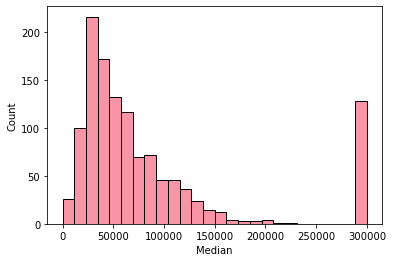

In [161]:
sns.histplot(df_income['Median'])

In [162]:
#There seemed to be a lot of erroneous median income values
# equal to exactly $300,000 for many cities, so I removed those
df_income = df_income[df_income['Median'] != 300000]
df_income

id  State_Code  State_Name State_ab              County  \
1735    6013318           6  California       CA  Los Angeles County   
2012   60212459           6  California       CA      Alameda County   
2013   60212469           6  California       CA      Alameda County   
2014   60212479           6  California       CA      Alameda County   
2015   60212489           6  California       CA      Alameda County   
...         ...         ...         ...      ...                 ...   
30867   5302409          53  Washington       WA        Adams County   
30878   5302419          53  Washington       WA        Adams County   
30889   5302429          53  Washington       WA        Adams County   
31011   5302539          53  Washington       WA        Adams County   
31114   5302699          53  Washington       WA        Adams County   

              City         Place   Type Primary  Zip_Code Area_Code    ALand  \
1735   Los Angeles      Westmont    CDP   place     90047       323  4785352   
2012   Los Angeles  Alameda city  Track   Track     90041       323  4107036   
2013   Los Angeles  Alameda city  Track   Track     90041       323  1094425   
2014   Los Angeles  Alameda city  Track   Track     90042       323   535234   
2015   Los Angeles  Alameda city  Track   Track     90042       323   485332   
...            ...           ...    ...     ...       ...       ...      ...   
30867      Seattle        Hatton  Track   Track     98118       206  2783287   
30878      Seattle        Hatton  Track   Track     98108       206  1070775   
30889      Seattle        Hatton  Track   Track     98118       206  3506716   
31011      Seattle        Hatton  Track   Track     98126       206  1160397   
31114      Seattle        Hatton  Track   Track     98146       206        0   

          AWater        Lat         Lon    Mean  Median  Stdev        sum_w  \
1735           0  33.941679 -118.301838   39928   26090  41109  7649.302158   
2012       30513  34.145267 -118.204386   88527   59408  72801   206.020316   
2013           0  34.134781 -118.192851  106443   86878  81571   170.322969   
2014           0  34.119972 -118.189286   56625   49009  36976   270.156337   
2015           0  34.121666 -118.209226   65014   46199  60243   273.520535   
...          ...        ...         ...     ...     ...    ...          ...   
30867    1396979  47.555977 -122.265750   99369   85368  65621   780.283702   
30878          0  47.538359 -122.286204   47899   28094  51251  1143.971756   
30889          0  47.520170 -122.282850   69658   60039  54538   930.085090   
31011          0  47.512846 -122.363268   74622   65411  47653   430.775298   
31114  239607761  47.510648 -122.415421       0       0      0     0.000000   

             Geolocate  
1735   Los Angeles, CA  
2012   Los Angeles, CA  
2013   Los Angeles, CA  
2014   Los Angeles, CA  
2015   Los Angeles, CA  
...                ...  
30867      Seattle, WA  
30878      Seattle, WA  
30889      Seattle, WA  
31011      Seattle, WA  
31114      Seattle, WA  

[1099 rows x 20 columns]

In [163]:
df_income = df_income.groupby(['Geolocate']).agg({'Mean': 'mean',
                                                  'Median': 'mean',
                                                  'Stdev': 'mean'}).reset_index()
df_income[['Mean', 'Median', 'Stdev']] = df_income[['Mean', 'Median', 'Stdev']].astype('int')
df_income = df_income.rename(columns = {'Mean':'Mean_2017income','Median':'Median_2017income','Stdev':'Stdev_2017income'})
df_income

Geolocate  Mean_2017income  Median_2017income  Stdev_2017income
0      Baltimore, MD            61988              52809             45595
1         Boston, MA            79133              59771             67582
2        Chicago, IL            62931              50270             49391
3         Dallas, TX            64670              55128             46893
4    Los Angeles, CA            57342              45533             46291
5       New York, NY            84977              73823             61328
6  San Francisco, CA            98358              83966             72248
7       San Jose, CA            93131              83024             61203
8        Seattle, WA            79901              66187             57554
9     Washington, DC            85698              73142             62392

#### Population Data

In [164]:
lat, lon, pop = [], [], []

for i, city in enumerate(city_list):
    if i == 6:
        pop.append(1026908)
        lat.append(37.33939)
        lon.append(-121.89496)
    else:
        geolocator = nm(user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36")
        location = geolocator.geocode(city)
        latitude = location.latitude
        longitude = location.longitude
        population = geocoder.geonames(city, key = 'haniszulaikha96').population
        
        pop.append(population)
        lat.append(latitude)
        lon.append(longitude)
        time.sleep(3)


In [165]:
population_dictionary = dict(zip(city_list, pop))
population = pd.DataFrame.from_dict(population_dictionary, orient='index', columns=['2019_Population'])
population = population.reset_index()
population['Latitude'] = lat
population['Longitude'] = lon
population

index  2019_Population   Latitude   Longitude
0     Washington, DC           689545  38.895037  -77.036543
1       New York, NY          8804190  40.712728  -74.006015
2  San Francisco, CA           864816  37.779026 -122.419906
3        Seattle, WA           737015  47.603832 -122.330062
4         Dallas, TX          1300092  32.776272  -96.796856
5    Los Angeles, CA          3971883  34.053691 -118.242766
6       San Jose, CA          1026908  37.339390 -121.894960
7        Chicago, IL          2720546  41.875562  -87.624421
8      Baltimore, MD           621849  39.290882  -76.610759
9         Boston, MA           675647  42.360253  -71.058291

Merge all out dataframes containing 2019 city population, 2017 median income and 2017 median house price.

In [166]:
city_df = df_income.merge(population, left_on = 'Geolocate',right_on='index')
city_df = city_df.drop('index',axis=1)
city_df

Geolocate  Mean_2017income  Median_2017income  Stdev_2017income  \
0      Baltimore, MD            61988              52809             45595   
1         Boston, MA            79133              59771             67582   
2        Chicago, IL            62931              50270             49391   
3         Dallas, TX            64670              55128             46893   
4    Los Angeles, CA            57342              45533             46291   
5       New York, NY            84977              73823             61328   
6  San Francisco, CA            98358              83966             72248   
7       San Jose, CA            93131              83024             61203   
8        Seattle, WA            79901              66187             57554   
9     Washington, DC            85698              73142             62392   

   2019_Population   Latitude   Longitude  
0           621849  39.290882  -76.610759  
1           675647  42.360253  -71.058291  
2          2720546  41.875562  -87.624421  
3          1300092  32.776272  -96.796856  
4          3971883  34.053691 -118.242766  
5          8804190  40.712728  -74.006015  
6           864816  37.779026 -122.419906  
7          1026908  37.339390 -121.894960  
8           737015  47.603832 -122.330062  
9           689545  38.895037  -77.036543

In [167]:
home_price_2017 = df_cities.groupby('Geolocate').median()
home_price_2017 = home_price_2017[['2017-12']]
home_price_2017 = home_price_2017.reset_index()
home_price_2017

Geolocate    2017-12
0      Baltimore, MD   160450.0
1         Boston, MA   551200.0
2        Chicago, IL   355200.0
3         Dallas, TX   326700.0
4    Los Angeles, CA   730500.0
5       New York, NY   727350.0
6  San Francisco, CA  1704500.0
7       San Jose, CA  1077100.0
8        Seattle, WA   827100.0
9     Washington, DC   771150.0

In [168]:
city_df = city_df.merge(home_price_2017)
city_df = city_df.rename(columns = {'2017-12':'Median_house_price_2017'})
city_df

Geolocate  Mean_2017income  Median_2017income  Stdev_2017income  \
0      Baltimore, MD            61988              52809             45595   
1         Boston, MA            79133              59771             67582   
2        Chicago, IL            62931              50270             49391   
3         Dallas, TX            64670              55128             46893   
4    Los Angeles, CA            57342              45533             46291   
5       New York, NY            84977              73823             61328   
6  San Francisco, CA            98358              83966             72248   
7       San Jose, CA            93131              83024             61203   
8        Seattle, WA            79901              66187             57554   
9     Washington, DC            85698              73142             62392   

   2019_Population   Latitude   Longitude  Median_house_price_2017  
0           621849  39.290882  -76.610759                 160450.0  
1           675647  42.360253  -71.058291                 551200.0  
2          2720546  41.875562  -87.624421                 355200.0  
3          1300092  32.776272  -96.796856                 326700.0  
4          3971883  34.053691 -118.242766                 730500.0  
5          8804190  40.712728  -74.006015                 727350.0  
6           864816  37.779026 -122.419906                1704500.0  
7          1026908  37.339390 -121.894960                1077100.0  
8           737015  47.603832 -122.330062                 827100.0  
9           689545  38.895037  -77.036543                 771150.0

#### Plotting all our dataframe

In [174]:
fig = px.scatter(city_df, x = 'Median_house_price_2017', 
                 y = 'Median_2017income', size = '2019_Population',
                 text="Geolocate",
                 size_max = 25, color = 'Median_house_price_2017',
                 color_continuous_scale = 'Bluered', hover_name = 'Geolocate',
                 hover_data = {'Latitude': False, 'Longitude': False,
                               '2019_Population': ':,2f', 'Median_2017income': ':$,2f',
                               'Median_house_price_2017': ':$,2f'},
                labels={"Median_house_price_2017": "2017 Median Home price", "Median_2017income": "2017 Median Income"})
fig.update_traces(textposition='top center')
fig.update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)",
                   "paper_bgcolor": "rgba(0, 0, 0, 0)"},
                  title_text = 'Median Household Income vs. Median Home Price ($USD) in the United States',
                  title_font_size = 18,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  showlegend = False,
                  hovermode = 'closest',
                  template = 'xgridoff')

## Time Series Data

### Prep time series data

Transforming the data from wide form to long form using a custom function.

In [20]:
# This function is provided with the starter notebook:
def melt_data(df,city):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','Geolocate'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    melted_df= melted.groupby('time').aggregate({'value':'median'})
    melted_df.rename(columns = {'value':city}, inplace = True)
    return melted_df

In [21]:
melted_df = pd.DataFrame()
for city in city_list:
    city_df = df[df['Geolocate'] == city]
    city_melt = melt_data(city_df,city)
    if len(melted_df) == 0:
        melted_df = city_melt
    else:
        melted_df=melted_df.join(city_melt)
melted_df

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-04-01        126500.0      175950.0           306900.0     170600.0   
1996-05-01        126250.0      175650.0           307600.0     171000.0   
1996-06-01        126000.0      175800.0           308400.0     171600.0   
1996-07-01        125800.0      175150.0           309300.0     172200.0   
1996-08-01        125750.0      174400.0           310500.0     173000.0   
1996-09-01        125900.0      174000.0           312000.0     173800.0   
1996-10-01        126250.0      174050.0           313700.0     174800.0   
1996-11-01        126650.0      173850.0           315600.0     176000.0   
1996-12-01        127300.0      174000.0           318100.0     177400.0   
1997-01-01        128050.0      174150.0           321000.0     179000.0   
1997-02-01        128800.0      174200.0           323900.0     180600.0   
1997-03-01        129500.0      174500.0           326600.0     182000.0   
1997-04-01        130200.0      174950.0           329600.0     183600.0   
1997-05-01        131050.0      175550.0           332600.0     185100.0   
1997-06-01        131900.0      176400.0           335800.0     186700.0   
1997-07-01        132650.0      177100.0           339200.0     188300.0   
1997-08-01        133350.0      177900.0           342700.0     190000.0   
1997-09-01        134000.0      178800.0           346400.0     192800.0   
1997-10-01        134800.0      179800.0           350400.0     196000.0   
1997-11-01        135700.0      181000.0           354500.0     199400.0   
1997-12-01        136650.0      181850.0           359100.0     203100.0   
1998-01-01        137600.0      182850.0           364200.0     206900.0   
1998-02-01        138500.0      183700.0           369300.0     210600.0   
1998-03-01        139150.0      184350.0           374100.0     214100.0   
1998-04-01        139950.0      185050.0           379100.0     217600.0   
1998-05-01        140750.0      185650.0           384000.0     221000.0   
1998-06-01        141700.0      186350.0           388900.0     224300.0   
1998-07-01        142650.0      187100.0           393700.0     227500.0   
1998-08-01        143650.0      187950.0           398300.0     230700.0   
1998-09-01        144750.0      189400.0           402600.0     233800.0   
1998-10-01        145950.0      190500.0           406800.0     236900.0   
1998-11-01        147250.0      191950.0           410900.0     240000.0   
1998-12-01        148800.0      193650.0           415400.0     243100.0   
1999-01-01        150500.0      195350.0           420200.0     246300.0   
1999-02-01        152150.0      196950.0           425100.0     249200.0   
1999-03-01        153650.0      198450.0           430000.0     251900.0   
1999-04-01        155200.0      200000.0           435400.0     254500.0   
1999-05-01        156750.0      202000.0           441300.0     257100.0   
1999-06-01        158350.0      204250.0           447900.0     259700.0   
1999-07-01        159950.0      206500.0           455500.0     262300.0   
1999-08-01        161550.0      208850.0           463900.0     265000.0   
1999-09-01        163150.0      211200.0           473100.0     267300.0   
1999-10-01        164750.0      213650.0           483300.0     269600.0   
1999-11-01        166350.0      216150.0           494300.0     272200.0   
1999-12-01        168150.0      218900.0           506200.0     274900.0   
2000-01-01        170100.0      221800.0           518700.0     277700.0   
2000-02-01        171950.0      224700.0           530800.0     280500.0   
2000-03-01        173650.0      227550.0           542100.0     283100.0   
2000-04-01        175300.0      229750.0           552700.0     285600.0   
2000-05-01        176950.0      232650.0           562300.0     288000.0   
2000-06-01        178750.0      235600.0           570800.0 

In [22]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Washington, DC     265 non-null    float64
 1   New York, NY       265 non-null    float64
 2   San Francisco, CA  265 non-null    float64
 3   Seattle, WA        265 non-null    float64
 4   Dallas, TX         265 non-null    float64
 5   Los Angeles, CA    265 non-null    float64
 6   San Jose, CA       265 non-null    float64
 7   Chicago, IL        265 non-null    float64
 8   Baltimore, MD      265 non-null    float64
 9   Boston, MA         265 non-null    float64
dtypes: float64(10)
memory usage: 30.9 KB


Resample data to yearly. 

In [23]:
resampled_year = melted_df.resample('A').median()
resampled_year

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-12-31        126250.0      174400.0           310500.0     173000.0   
1997-12-31        132275.0      176750.0           337500.0     187500.0   
1998-12-31        142175.0      186725.0           391300.0     225900.0   
1999-12-31        159150.0      205375.0           451700.0     261000.0   
2000-12-31        179700.0      237050.0           575200.0     291600.0   
2001-12-31        220050.0      268150.0           629200.0     310200.0   
2002-12-31        273600.0      293100.0           638850.0     326600.0   
2003-12-31        317125.0      344775.0           687300.0     339400.0   
2004-12-31        398425.0      400200.0           813500.0     378200.0   
2005-12-31        492725.0      484375.0           901050.0     437200.0   
2006-12-31        511175.0      557325.0           897400.0     498550.0   
2007-12-31        515350.0      552500.0           939000.0     522700.0   
2008-12-31        489050.0      518725.0           923300.0     496350.0   
2009-12-31        454425.0      476325.0           809800.0     435500.0   
2010-12-31        452600.0      475025.0           834300.0     426500.0   
2011-12-31        437225.0      468475.0           818100.0     394700.0   
2012-12-31        465225.0      449850.0           869750.0     418050.0   
2013-12-31        517325.0      491750.0          1046750.0     473800.0   
2014-12-31        605500.0      529000.0          1249550.0     500300.0   
2015-12-31        662300.0      576425.0          1401950.0     569100.0   
2016-12-31        709500.0      626300.0          1473450.0     678150.0   
2017-12-31        746750.0      691275.0          1585300.0     785300.0   
2018-12-31        779850.0      741650.0          1747750.0     848300.0   

            Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  \
time                                                                 
1996-12-31    167250.0         166000.0      238800.0     149050.0   
1997-12-31    169600.0         171400.0      262550.0     143150.0   
1998-12-31    171975.0         190700.0      305650.0     162000.0   
1999-12-31    169150.0         211700.0      344750.0     183200.0   
2000-12-31    175275.0         235750.0      446050.0     210575.0   
2001-12-31    179100.0         265250.0      472450.0     235875.0   
2002-12-31    183425.0         307150.0      478350.0     253950.0   
2003-12-31    183875.0         374500.0      491500.0     277575.0   
2004-12-31    192025.0         493700.0      565500.0     312575.0   
2005-12-31    200225.0         597800.0      688500.0     352875.0   
2006-12-31    206875.0         648500.0      707850.0     383000.0   
2007-12-31    213700.0         611800.0      710300.0     386825.0   
2008-12-31    210775.0         509200.0      628000.0     363950.0   
2009-12-31    215450.0         453750.0      530700.0     321375.0   
2010-12-31    218775.0         457000.0      544350.0     298700.0   
2011-12-31    212125.0         421850.0      522700.0     270125.0   
2012-12-31    216700.0         418750.0      548700.0     260200.0   
2013-12-31    224275.0         488800.0      659750.0     289450.0   
2014-12-31    222500.0         545450.0      718350.0     315100.0   
2015-12-31    254500.0         583900.0      821250.0     319850.0   
2016-12-31    277750.0         648950.0      894950.0     340100.0   
2017-12-31    318700.0         690250.0      955850.0     355350.0   
2018-12-31    332350.0         741750.0     1134150.0     356300.0   

            Baltimore, MD  Boston, MA  
time                                   
1996-12-31        58100.0    118200.0  
1997-12-31        59575.0    126900.0  
1998-12-31        61350.0    138050.0  
1999-12-31        65075.0    160950.0  
2000-12-31        71600.0    200500.0  
2001-12-31        77125.0    226650.0  
2002-12-31        82325.0    264700.0  


Resample data to quarterly.

In [24]:
resampled_quarter = melted_df.resample('Q').median()
resampled_quarter

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-06-30        126250.0      175800.0           307600.0     171000.0   
1996-09-30        125800.0      174400.0           310500.0     173000.0   
1996-12-31        126650.0      174000.0           315600.0     176000.0   
1997-03-31        128800.0      174200.0           323900.0     180600.0   
1997-06-30        131050.0      175550.0           332600.0     185100.0   
1997-09-30        133350.0      177900.0           342700.0     190000.0   
1997-12-31        135700.0      181000.0           354500.0     199400.0   
1998-03-31        138500.0      183700.0           369300.0     210600.0   
1998-06-30        140750.0      185650.0           384000.0     221000.0   
1998-09-30        143650.0      187950.0           398300.0     230700.0   
1998-12-31        147250.0      191950.0           410900.0     240000.0   
1999-03-31        152150.0      196950.0           425100.0     249200.0   
1999-06-30        156750.0      202000.0           441300.0     257100.0   
1999-09-30        161550.0      208850.0           463900.0     265000.0   
1999-12-31        166350.0      216150.0           494300.0     272200.0   
2000-03-31        171950.0      224700.0           530800.0     280500.0   
2000-06-30        176950.0      232650.0           562300.0     288000.0   
2000-09-30        182750.0      241250.0           588300.0     295100.0   
2000-12-31        190600.0      250900.0           609300.0     300200.0   
2001-03-31        201500.0      259000.0           623400.0     304700.0   
2001-06-30        213550.0      265350.0           630000.0     308600.0   
2001-09-30        226750.0      270800.0           633000.0     311300.0   
2001-12-31        241050.0      276300.0           628800.0     314000.0   
2002-03-31        255500.0      282800.0           628800.0     319500.0   
2002-06-30        268000.0      290000.0           636800.0     325000.0   
2002-09-30        277650.0      295950.0           646200.0     327900.0   
2002-12-31        285100.0      303200.0           665000.0     329500.0   
2003-03-31        292400.0      319700.0           677500.0     331100.0   
2003-06-30        305150.0      340300.0           686100.0     335900.0   
2003-09-30        330550.0      349100.0           690300.0     343000.0   
2003-12-31        353300.0      359400.0           710000.0     352600.0   
2004-03-31        368800.0      382000.0           747800.0     364100.0   
2004-06-30        387500.0      390700.0           791800.0     374000.0   
2004-09-30        409700.0      411000.0           832600.0     384800.0   
2004-12-31        436800.0      435700.0           861800.0     401600.0   
2005-03-31        466050.0      455050.0           883800.0     415500.0   
2005-06-30        485350.0      475550.0           898700.0     430300.0   
2005-09-30        497200.0      495900.0           901100.0     443900.0   
2005-12-31        502950.0      526050.0           923600.0     460900.0   
2006-03-31        508850.0      544150.0           932100.0     477000.0   
2006-06-30        512100.0      555900.0           909100.0     493800.0   
2006-09-30        511800.0      564400.0           886700.0     502400.0   
2006-12-31        510600.0      559800.0           874900.0     508000.0   
2007-03-31        513500.0      552600.0           883200.0     516300.0   
2007-06-30        516800.0      555050.0           920900.0     523100.0   
2007-09-30        516650.0      549850.0           951200.0     524600.0   
2007-12-31        511850.0      544450.0           952400.0     522300.0   
2008-03-31        502200.0      538150.0           943200.0     515300.0   
2008-06-30        492450.0      527100.0           933100.0     503000.0   
2008-09-30        485300.0      511200.0           909200.0     488000.0   
2008-12-31        475850.0      500050.0           879300.0 

### EDA Time series data

**Plot of monthly data from 1996 - 2018**

In [145]:
# Plot median house price time series for each City: 
fig = px.line(melted_df, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)",
                   "paper_bgcolor": "rgba(0, 0, 0, 0)"},
                  title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

**Plot quarterly data from 1996 - 2018**

In [26]:
# Plot median house price time series for each City: 
fig = px.line(resampled_quarter, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

**Plot of Yearly data from 1996-2018**

In [27]:
# Plot median house price time series for each City: 
fig = px.line(resampled_year, labels={"variable": "City", "value": "Median Home Prices ($M)","time":"Year"})

fig.update_layout(title_text = 'Median Home Prices (1996 - 2018)',
                  title_font_size = 24,
                  title_xref = 'container',
                  title_y = 0.95,
                  title_x = 0.5,
                  hovermode = 'closest',
                  template = 'xgridoff')
fig.show()

### Return of investments by city

In [28]:
# Calculate return for each City: 
df_return = melted_df.pct_change()
df_return

# drop the first row of the df_return dataframe:
df_return.dropna(axis=0, inplace=True)

df_return.head()

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-05-01       -0.001976     -0.001705           0.002281     0.002345   
1996-06-01       -0.001980      0.000854           0.002601     0.003509   
1996-07-01       -0.001587     -0.003697           0.002918     0.003497   
1996-08-01       -0.000397     -0.004282           0.003880     0.004646   
1996-09-01        0.001193     -0.002294           0.004831     0.004624   

            Dallas, TX  Los Angeles, CA  San Jose, CA  Chicago, IL  \
time                                                                 
1996-05-01    0.005443         0.004834      0.002131    -0.000334   
1996-06-01    0.003609         0.003608      0.003403    -0.001670   
1996-07-01    0.001498        -0.002397      0.005935    -0.002342   
1996-08-01    0.000898        -0.001802      0.006321    -0.000335   
1996-09-01    0.000598        -0.001805      0.006700    -0.002684   

            Baltimore, MD  Boston, MA  
time                                   
1996-05-01       0.000868    0.004303  
1996-06-01       0.001735    0.004284  
1996-07-01       0.003463    0.004266  
1996-08-01       0.002588    0.004248  
1996-09-01       0.001721    0.005076

In [29]:
# Construct new dataframe for EDA purposes:
#mean monthly return
df_cum = pd.DataFrame(data=df_return.mean())
df_cum.rename(columns = {0:'MonthlyReturnMean'}, inplace = True)

#cumulative return
cumsum = []
for i in df_cum.index:
    cumsum.append(df_return[i].cumsum()[-1])
df_cum['CumulativeReturn'] = cumsum

# cumulative return %
df_cum['CumulativeReturn(%)'] = df_cum['CumulativeReturn']*100
df_cum
# Average Yearly Return (%)
df_cum['AverageYearlyReturn(%)'] = df_cum['CumulativeReturn']*100/9 # We have 9 years in our data

# reset the index
df_cum = df_cum.reset_index()
# name the index - city
df_cum.rename(columns = {'index':'City'}, inplace = True)

df_cum

City  MonthlyReturnMean  CumulativeReturn  \
0     Washington, DC           0.006974          1.841082   
1       New York, NY           0.005513          1.455501   
2  San Francisco, CA           0.006702          1.769298   
3        Seattle, WA           0.006131          1.618558   
4         Dallas, TX           0.002697          0.711988   
5    Los Angeles, CA           0.005856          1.545909   
6       San Jose, CA           0.006150          1.623723   
7        Chicago, IL           0.003320          0.876383   
8      Baltimore, MD           0.004147          1.094929   
9         Boston, MA           0.006149          1.623328   

   CumulativeReturn(%)  AverageYearlyReturn(%)  
0           184.108192               20.456466  
1           145.550076               16.172231  
2           176.929816               19.658868  
3           161.855787               17.983976  
4            71.198799                7.910978  
5           154.590896               17.176766  
6           162.372327               18.041370  
7            87.638326                9.737592  
8           109.492850               12.165872  
9           162.332818               18.036980

## Model Building

### Time series data decomposition

In [30]:
#Obtained this function from lecture 58 notebook. Used for better
#readabilty.

def display_df(dftest):
    '''
    Display the output from a Dickey-Fuller test in a more readable format
    '''
    
    
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    display(dfoutput)

Let's first start looking at the decomposition of our time series data of homes prices from 1996 - 2018 from Washington, DC.

In [31]:
#Decomposing
decomposition = seasonal_decompose(melted_df['Washington, DC'])

#General trend. (i.e. overtime,how does the house market change.)
trend = decomposition.trend

#Seasonal trend
seasonal = decomposition.seasonal

#This will be the leftover noise in the model.
residual = decomposition.resid

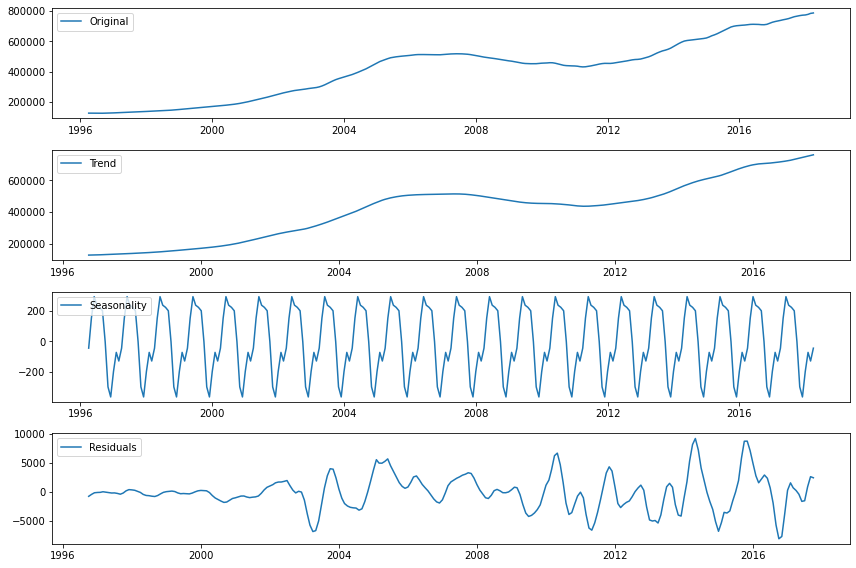

In [32]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(melted_df['Washington, DC'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

In [33]:
# Drop NaN values from residuals.

house_ts_decompose = residual 
house_ts_decompose.dropna(inplace = True)

In [34]:
#After we take out the trend and the seasonality, we look at our residual
#with no null values.
dftest = adfuller(house_ts_decompose)

#Print out our results. 
display_df(dftest)

Test Statistic                  -4.719574
p-value                          0.000077
#Lags Used                      10.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64

We got a stationary time series but we see that there are some trends in there still. We know that because our residuals is heteroskedastic.

We are going to make a function that takes in all of our selected cities and make a time series model for all of the cities

In [35]:
#def decompose_ts(city):
  #  decomposition = seasonal_decompose(melted_df[city])
  #  trend = decomposition.trend
  #  seasonal = decomposition.seasonal
   # residual = decomposition.resid
    

### Baseline Model

Function to build baseline model

In [36]:
class baseline_mod:
    
    def __init__(self,city='Washington, DC'):
        self.city = city
    
    def plot_shift(self,df):
        ax = df[self.city].plot(figsize=(15,10))
        df[self.city].shift(1).plot()
        df[self.city].shift(2).plot()
        ax.legend(['Original', 'shift 1', 'shift 2'])
        plt.show()
        
        
    def shift_df(self, df):
        self.shifted_df = pd.DataFrame(np.hstack((df[self.city].values.reshape(-1, 1),
                                                  df[self.city].shift().values.reshape(-1, 1),
                                                  df[self.city].shift(periods=2).values.reshape(-1, 1))),
                                       columns=['orig', 'shifted_one_period', 'shifted_two_periods'],
                                       index=df.index)
        self.rmse_shift1_ = mean_squared_error(self.shifted_df['orig'][1:], self.shifted_df['shifted_one_period'][1:], squared=False)
        self.rmse_shift2_ = mean_squared_error(self.shifted_df['orig'][2:], self.shifted_df['shifted_two_periods'][2:], squared=False)
        return self.shifted_df

        

Look at plot of shifted time series for Washington, DC

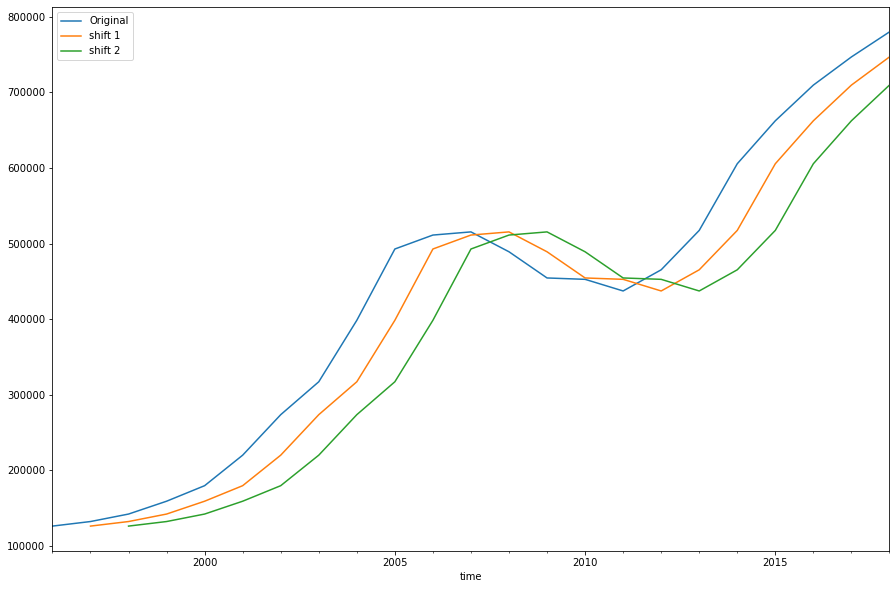

In [37]:
baseline_year = baseline_mod()
baseline_year.plot_shift(resampled_year)

Build dataframe of shifted values in Washington, DC.

In [38]:
baseline_year.shift_df(resampled_year)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-12-31  126250.0                 NaN                  NaN
1997-12-31  132275.0            126250.0                  NaN
1998-12-31  142175.0            132275.0             126250.0
1999-12-31  159150.0            142175.0             132275.0
2000-12-31  179700.0            159150.0             142175.0
2001-12-31  220050.0            179700.0             159150.0
2002-12-31  273600.0            220050.0             179700.0
2003-12-31  317125.0            273600.0             220050.0
2004-12-31  398425.0            317125.0             273600.0
2005-12-31  492725.0            398425.0             317125.0
2006-12-31  511175.0            492725.0             398425.0
2007-12-31  515350.0            511175.0             492725.0
2008-12-31  489050.0            515350.0             511175.0
2009-12-31  454425.0            489050.0             515350.0
2010-12-31  452600.0            454425.0             489050.0
2011-12-31  437225.0            452600.0             454425.0
2012-12-31  465225.0            437225.0             452600.0
2013-12-31  517325.0            465225.0             437225.0
2014-12-31  605500.0            517325.0             465225.0
2015-12-31  662300.0            605500.0             517325.0
2016-12-31  709500.0            662300.0             605500.0
2017-12-31  746750.0            709500.0             662300.0
2018-12-31  779850.0            746750.0             709500.0

In [39]:
print(baseline_year.rmse_shift1_)
print(baseline_year.rmse_shift2_)

44942.247030848586
87278.32651788132


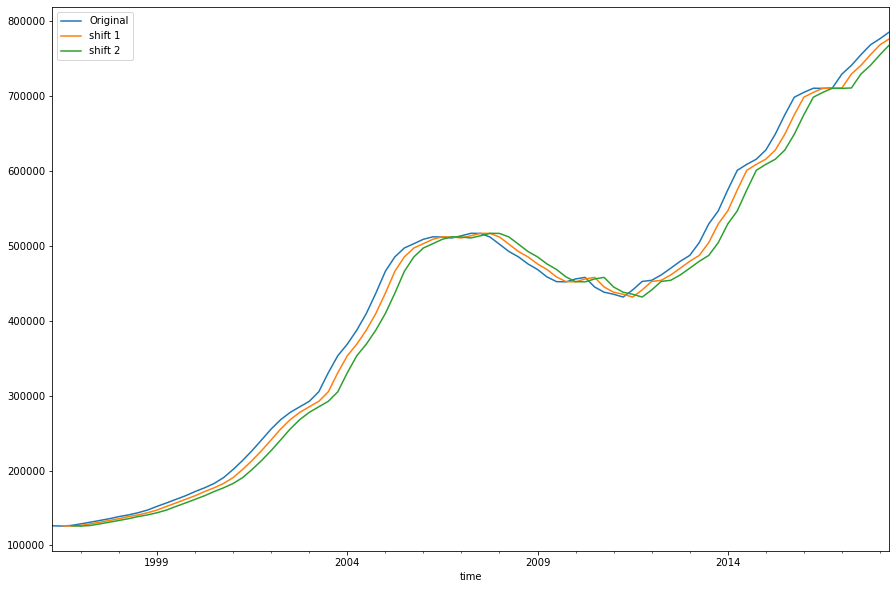

In [40]:
baseline_quarterly = baseline_mod()
baseline_quarterly.plot_shift(resampled_quarter)

In [41]:
baseline_quarterly.shift_df(resampled_quarter)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-06-30  126250.0                 NaN                  NaN
1996-09-30  125800.0            126250.0                  NaN
1996-12-31  126650.0            125800.0             126250.0
1997-03-31  128800.0            126650.0             125800.0
1997-06-30  131050.0            128800.0             126650.0
1997-09-30  133350.0            131050.0             128800.0
1997-12-31  135700.0            133350.0             131050.0
1998-03-31  138500.0            135700.0             133350.0
1998-06-30  140750.0            138500.0             135700.0
1998-09-30  143650.0            140750.0             138500.0
1998-12-31  147250.0            143650.0             140750.0
1999-03-31  152150.0            147250.0             143650.0
1999-06-30  156750.0            152150.0             147250.0
1999-09-30  161550.0            156750.0             152150.0
1999-12-31  166350.0            161550.0             156750.0
2000-03-31  171950.0            166350.0             161550.0
2000-06-30  176950.0            171950.0             166350.0
2000-09-30  182750.0            176950.0             171950.0
2000-12-31  190600.0            182750.0             176950.0
2001-03-31  201500.0            190600.0             182750.0
2001-06-30  213550.0            201500.0             190600.0
2001-09-30  226750.0            213550.0             201500.0
2001-12-31  241050.0            226750.0             213550.0
2002-03-31  255500.0            241050.0             226750.0
2002-06-30  268000.0            255500.0             241050.0
2002-09-30  277650.0            268000.0             255500.0
2002-12-31  285100.0            277650.0             268000.0
2003-03-31  292400.0            285100.0             277650.0
2003-06-30  305150.0            292400.0             285100.0
2003-09-30  330550.0            305150.0             292400.0
2003-12-31  353300.0            330550.0             305150.0
2004-03-31  368800.0            353300.0             330550.0
2004-06-30  387500.0            368800.0             353300.0
2004-09-30  409700.0            387500.0             368800.0
2004-12-31  436800.0            409700.0             387500.0
2005-03-31  466050.0            436800.0             409700.0
2005-06-30  485350.0            466050.0             436800.0
2005-09-30  497200.0            485350.0             466050.0
2005-12-31  502950.0            497200.0             485350.0
2006-03-31  508850.0            502950.0             497200.0
2006-06-30  512100.0            508850.0             502950.0
2006-09-30  511800.0            512100.0             508850.0
2006-12-31  510600.0            511800.0             512100.0
2007-03-31  513500.0            510600.0             511800.0
2007-06-30  516800.0            513500.0             510600.0
2007-09-30  516650.0            516800.0             513500.0
2007-12-31  511850.0            516650.0             516800.0
2008-03-31  502200.0            511850.0             516650.0
2008-06-30  492450.0            502200.0             511850.0
2008-09-30  485300.0            492450.0             502200.0
2008-12-31  475850.0            485300.0             492450.0
2009-03-31  468450.0            475850.0             485300.0
2009-06-30  458500.0            468450.0             475850.0
2009-09-30  452250.0            458500.0             468450.0
2009-12-31  451950.0            452250.0             458500.0
2010-03-31  455850.0            451950.0             452250.0
2010-06-30  457950.0            455850.0             451950.0
2010-09-30  445100.0            457950.0             455850.0
2010-12-31  438150.0            445100.0             457950.0
2011-03-31  435400.0            438150.0             445100.0
2011-06-30  431650.0            435400.0             438150.0
2011-09-30  441150.0            431650.0             435400.0
2011-12-31  452500.0            441150.0        

In [42]:
print(baseline_quarterly.rmse_shift1_)
print(baseline_quarterly.rmse_shift2_)

12208.992122053467
23845.184940100302


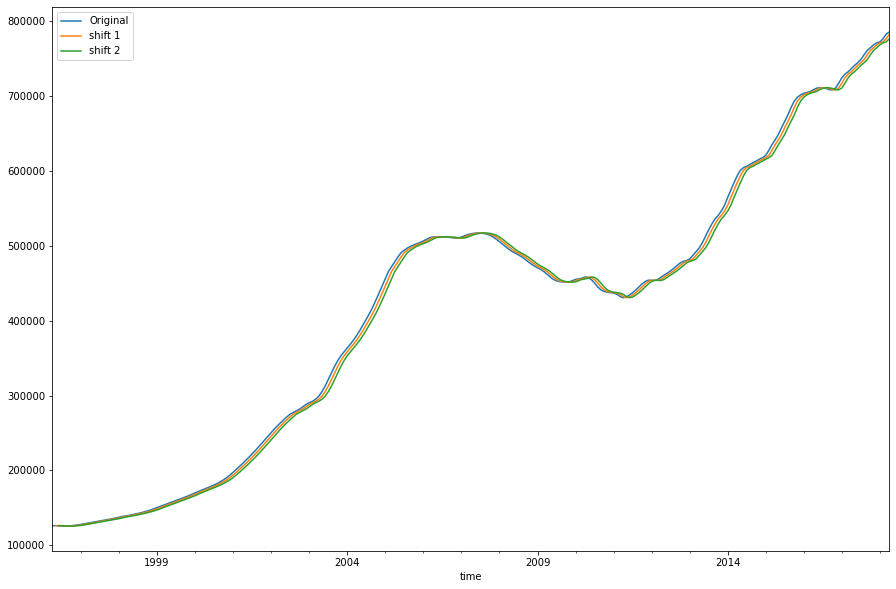

In [43]:
baseline_monthly = baseline_mod()
baseline_monthly.plot_shift(melted_df)

In [44]:
baseline_monthly.shift_df(melted_df)

orig  shifted_one_period  shifted_two_periods
time                                                         
1996-04-01  126500.0                 NaN                  NaN
1996-05-01  126250.0            126500.0                  NaN
1996-06-01  126000.0            126250.0             126500.0
1996-07-01  125800.0            126000.0             126250.0
1996-08-01  125750.0            125800.0             126000.0
1996-09-01  125900.0            125750.0             125800.0
1996-10-01  126250.0            125900.0             125750.0
1996-11-01  126650.0            126250.0             125900.0
1996-12-01  127300.0            126650.0             126250.0
1997-01-01  128050.0            127300.0             126650.0
1997-02-01  128800.0            128050.0             127300.0
1997-03-01  129500.0            128800.0             128050.0
1997-04-01  130200.0            129500.0             128800.0
1997-05-01  131050.0            130200.0             129500.0
1997-06-01  131900.0            131050.0             130200.0
1997-07-01  132650.0            131900.0             131050.0
1997-08-01  133350.0            132650.0             131900.0
1997-09-01  134000.0            133350.0             132650.0
1997-10-01  134800.0            134000.0             133350.0
1997-11-01  135700.0            134800.0             134000.0
1997-12-01  136650.0            135700.0             134800.0
1998-01-01  137600.0            136650.0             135700.0
1998-02-01  138500.0            137600.0             136650.0
1998-03-01  139150.0            138500.0             137600.0
1998-04-01  139950.0            139150.0             138500.0
1998-05-01  140750.0            139950.0             139150.0
1998-06-01  141700.0            140750.0             139950.0
1998-07-01  142650.0            141700.0             140750.0
1998-08-01  143650.0            142650.0             141700.0
1998-09-01  144750.0            143650.0             142650.0
1998-10-01  145950.0            144750.0             143650.0
1998-11-01  147250.0            145950.0             144750.0
1998-12-01  148800.0            147250.0             145950.0
1999-01-01  150500.0            148800.0             147250.0
1999-02-01  152150.0            150500.0             148800.0
1999-03-01  153650.0            152150.0             150500.0
1999-04-01  155200.0            153650.0             152150.0
1999-05-01  156750.0            155200.0             153650.0
1999-06-01  158350.0            156750.0             155200.0
1999-07-01  159950.0            158350.0             156750.0
1999-08-01  161550.0            159950.0             158350.0
1999-09-01  163150.0            161550.0             159950.0
1999-10-01  164750.0            163150.0             161550.0
1999-11-01  166350.0            164750.0             163150.0
1999-12-01  168150.0            166350.0             164750.0
2000-01-01  170100.0            168150.0             166350.0
2000-02-01  171950.0            170100.0             168150.0
2000-03-01  173650.0            171950.0             170100.0
2000-04-01  175300.0            173650.0             171950.0
2000-05-01  176950.0            175300.0             173650.0
2000-06-01  178750.0            176950.0             175300.0
2000-07-01  180650.0            178750.0             176950.0
2000-08-01  182750.0            180650.0             178750.0
2000-09-01  185050.0            182750.0             180650.0
2000-10-01  187650.0            185050.0             182750.0
2000-11-01  190600.0            187650.0             185050.0
2000-12-01  194000.0            190600.0             187650.0
2001-01-01  197650.0            194000.0             190600.0
2001-02-01  201500.0            197650.0             194000.0
2001-03-01  205350.0            201500.0             197650.0
2001-04-01  209400.0            205350.0             201500.0
2001-05-01  213550.0            209400.0             205350.0
2001-06-01  217850.0            213550.0        

In [45]:
print(baseline_monthly.rmse_shift1_)
print(baseline_monthly.rmse_shift2_)

4139.46156467898
8226.567713804458


### ARIMA model

In [46]:
def add_freq(idx, freq=None):
    """Add a frequency attribute to idx, through inference or directly.

    Returns a copy.  If `freq` is None, it is inferred.
    """

    idx = idx.copy()
    if freq is None:
        if idx.freq is None:
            freq = pd.infer_freq(idx)
        else:
            return idx
    idx.freq = pd.tseries.frequencies.to_offset(freq)
    if idx.freq is None:
        raise AttributeError('no discernible frequency found to `idx`.  Specify'
                             ' a frequency string with `freq`.')
    return idx

In [47]:
#We are adding frequency attribute to our dataframe index. 
melted_df.index = add_freq(melted_df.index)
#Check the length of our dataframe. 
melted_df.shape

(265, 10)

In [48]:
melted_df

Washington, DC  New York, NY  San Francisco, CA  Seattle, WA  \
time                                                                       
1996-04-01        126500.0      175950.0           306900.0     170600.0   
1996-05-01        126250.0      175650.0           307600.0     171000.0   
1996-06-01        126000.0      175800.0           308400.0     171600.0   
1996-07-01        125800.0      175150.0           309300.0     172200.0   
1996-08-01        125750.0      174400.0           310500.0     173000.0   
1996-09-01        125900.0      174000.0           312000.0     173800.0   
1996-10-01        126250.0      174050.0           313700.0     174800.0   
1996-11-01        126650.0      173850.0           315600.0     176000.0   
1996-12-01        127300.0      174000.0           318100.0     177400.0   
1997-01-01        128050.0      174150.0           321000.0     179000.0   
1997-02-01        128800.0      174200.0           323900.0     180600.0   
1997-03-01        129500.0      174500.0           326600.0     182000.0   
1997-04-01        130200.0      174950.0           329600.0     183600.0   
1997-05-01        131050.0      175550.0           332600.0     185100.0   
1997-06-01        131900.0      176400.0           335800.0     186700.0   
1997-07-01        132650.0      177100.0           339200.0     188300.0   
1997-08-01        133350.0      177900.0           342700.0     190000.0   
1997-09-01        134000.0      178800.0           346400.0     192800.0   
1997-10-01        134800.0      179800.0           350400.0     196000.0   
1997-11-01        135700.0      181000.0           354500.0     199400.0   
1997-12-01        136650.0      181850.0           359100.0     203100.0   
1998-01-01        137600.0      182850.0           364200.0     206900.0   
1998-02-01        138500.0      183700.0           369300.0     210600.0   
1998-03-01        139150.0      184350.0           374100.0     214100.0   
1998-04-01        139950.0      185050.0           379100.0     217600.0   
1998-05-01        140750.0      185650.0           384000.0     221000.0   
1998-06-01        141700.0      186350.0           388900.0     224300.0   
1998-07-01        142650.0      187100.0           393700.0     227500.0   
1998-08-01        143650.0      187950.0           398300.0     230700.0   
1998-09-01        144750.0      189400.0           402600.0     233800.0   
1998-10-01        145950.0      190500.0           406800.0     236900.0   
1998-11-01        147250.0      191950.0           410900.0     240000.0   
1998-12-01        148800.0      193650.0           415400.0     243100.0   
1999-01-01        150500.0      195350.0           420200.0     246300.0   
1999-02-01        152150.0      196950.0           425100.0     249200.0   
1999-03-01        153650.0      198450.0           430000.0     251900.0   
1999-04-01        155200.0      200000.0           435400.0     254500.0   
1999-05-01        156750.0      202000.0           441300.0     257100.0   
1999-06-01        158350.0      204250.0           447900.0     259700.0   
1999-07-01        159950.0      206500.0           455500.0     262300.0   
1999-08-01        161550.0      208850.0           463900.0     265000.0   
1999-09-01        163150.0      211200.0           473100.0     267300.0   
1999-10-01        164750.0      213650.0           483300.0     269600.0   
1999-11-01        166350.0      216150.0           494300.0     272200.0   
1999-12-01        168150.0      218900.0           506200.0     274900.0   
2000-01-01        170100.0      221800.0           518700.0     277700.0   
2000-02-01        171950.0      224700.0           530800.0     280500.0   
2000-03-01        173650.0      227550.0           542100.0     283100.0   
2000-04-01        175300.0      229750.0           552700.0     285600.0   
2000-05-01        176950.0      232650.0           562300.0     288000.0   
2000-06-01        178750.0      235600.0           570800.0 

We'll be splitting our data into our train-test split. 
We are making the first 80% of our data into the training set and the last 20% of our dataset into our test set.

In [49]:
train = melted_df.iloc[:212]
test = melted_df.iloc[212:]

In [50]:
# #Here, we are splitting the training set into cross-validations score. 
# split = TimeSeriesSplit()
# for train_ind, val_ind in split.split(train):
    
# #     print(f'Train index: {train_ind}')
# #     print(f'Test  index: {val_ind}')

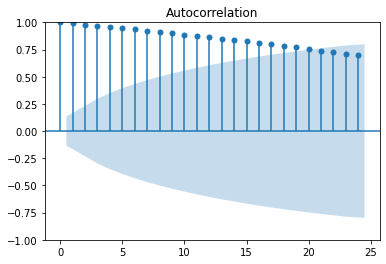

In [51]:
#Plotting the acf for Washington DC just for visualization. 
plot_acf(train['Washington, DC'].dropna());

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



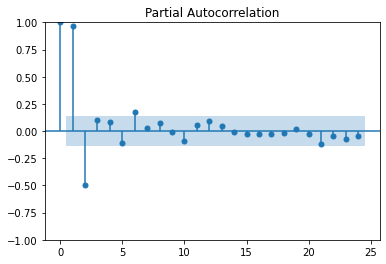

In [52]:
#Plotted our PACF for Washington DC.
#Diff is plotting the particial autocorrelation of the graph.
plot_pacf(train['Washington, DC'].diff().dropna());

In [53]:
class arima_mod: 
    
    def __init__(self, city = 'Washington, DC'):
        self.city = city 

        
    def model(self, df_train, df_test,p,d,q):
        #Fitting our model using ARIMA and instantiating it
        self.model_fit = ARIMA(df_train[self.city], order = [p,d,q]).fit()
        #Creating our prediction 
        self.y_hat_test_ = self.model_fit.predict(start=df_test[self.city].index[0], 
                                                  end=df_test[self.city].index[-1],typ='levels')
        self.model_summary_ = self.model_fit.summary()
        self.rmse_ = mean_squared_error(df_test[self.city],
                                        self.y_hat_test_,
                                        squared=False)
        print(self.model_summary_)
        print('-'*23)
        print('-'*23)
        print(f'RMSE: {self.rmse_}')
    
    def plot(self, df_test):
        fig, ax = plt.subplots(figsize = (12,8)) 
        ax.plot(df_test[self.city])
        ax.plot(self.y_hat_test_)
        ax.legend(['Original', 'Predicted'])
        ax.set_title(f'Original vs Predicted home values for {self.city}')

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2000.053
Date:                Wed, 11 May 2022   AIC                           4012.106
Time:                        13:19:56   BIC                           4032.217
Sample:                    04-01-1996   HQIC                          4020.235
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1242      0.038     55.263      0.000       2.049       2.200
ar.L2         -1.2499      0.053    -23.441      0.000      -1.354      -1.145
ar.L3          0.1256      0.017      7.498      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2066.811
Date:                Wed, 11 May 2022   AIC                           4145.621
Time:                        13:19:56   BIC                           4165.732
Sample:                    04-01-1996   HQIC                          4153.751
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6783      0.948      1.771      0.077      -0.179       3.536
ar.L2         -0.7150      0.932     -0.767      0.443      -2.542       1.112
ar.L3          0.0234      0.023      1.023      0.3

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2509.268
Date:                Wed, 11 May 2022   AIC                           5030.536
Time:                        13:19:57   BIC                           5050.647
Sample:                    04-01-1996   HQIC                          5038.666
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9545      0.015    129.167      0.000       1.925       1.984
ar.L2         -0.9950      0.017    -57.153      0.000      -1.029      -0.961
ar.L3          0.0404      0.003     14.343      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2056.163
Date:                Wed, 11 May 2022   AIC                           4124.326
Time:                        13:19:59   BIC                           4144.437
Sample:                    04-01-1996   HQIC                          4132.455
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9435      1.298      1.497      0.134      -0.600       4.487
ar.L2         -0.9572      1.232     -0.777      0.437      -3.372       1.457
ar.L3          0.0137      0.024      0.570      0.5

                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2000.172
Date:                Wed, 11 May 2022   AIC                           4012.345
Time:                        13:20:01   BIC                           4032.456
Sample:                    04-01-1996   HQIC                          4020.474
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9916      0.178     11.210      0.000       1.643       2.340
ar.L2         -1.0225      0.179     -5.704      0.000      -1.374      -0.671
ar.L3          0.0307      0.006      4.885      0.0

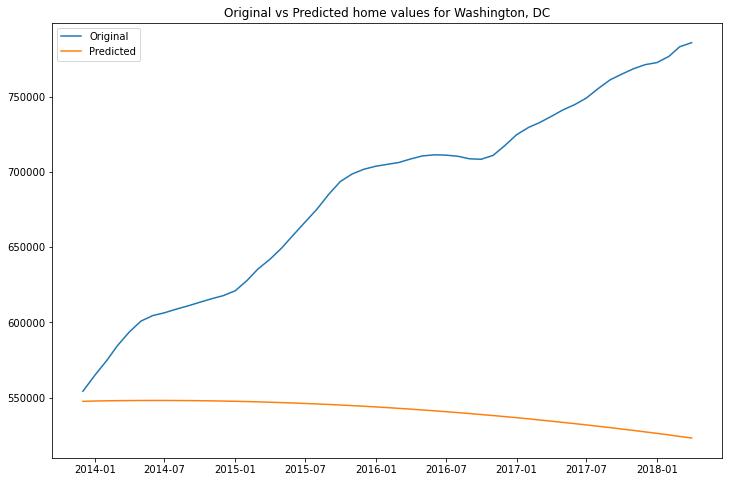

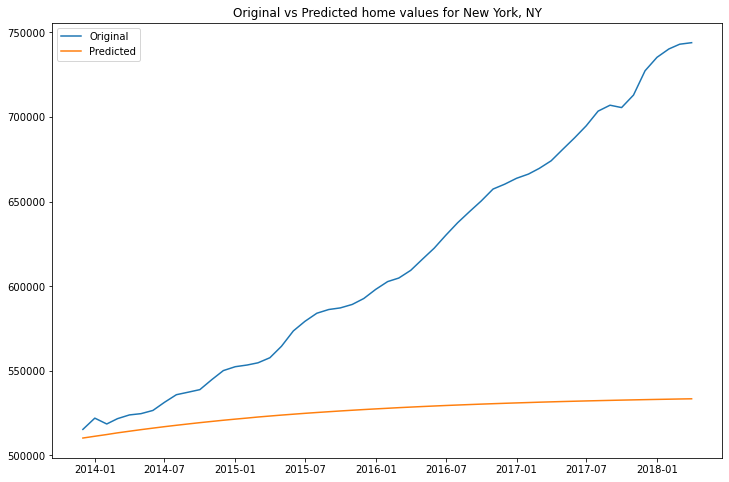

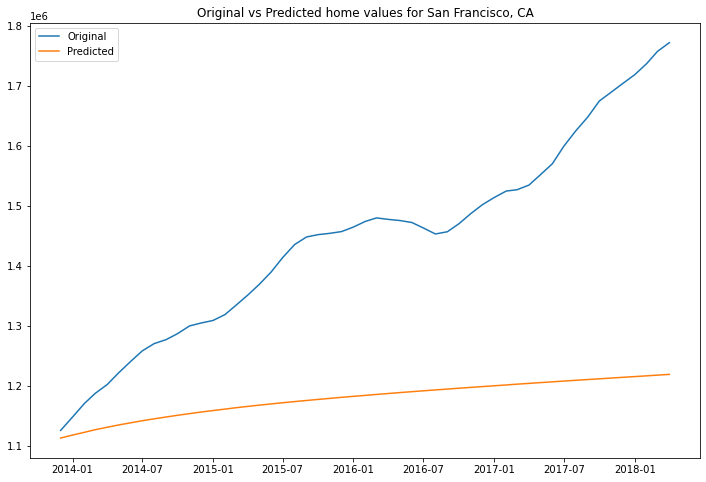

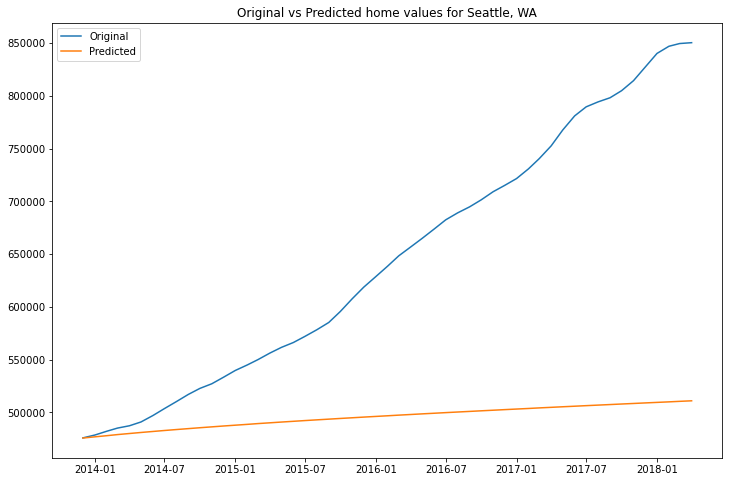

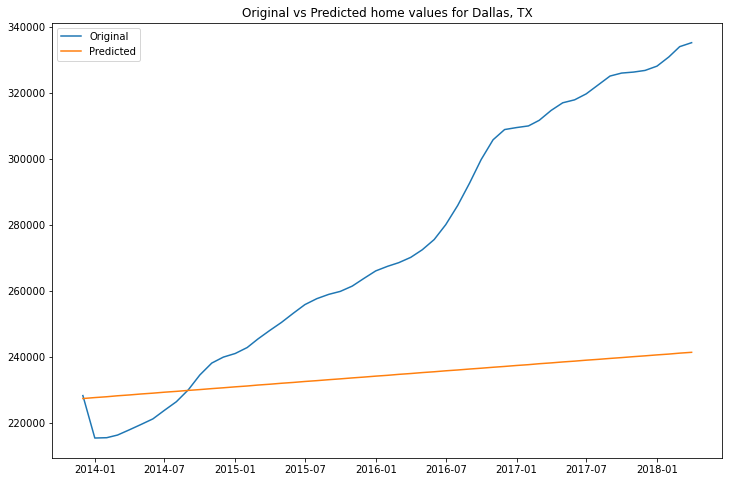

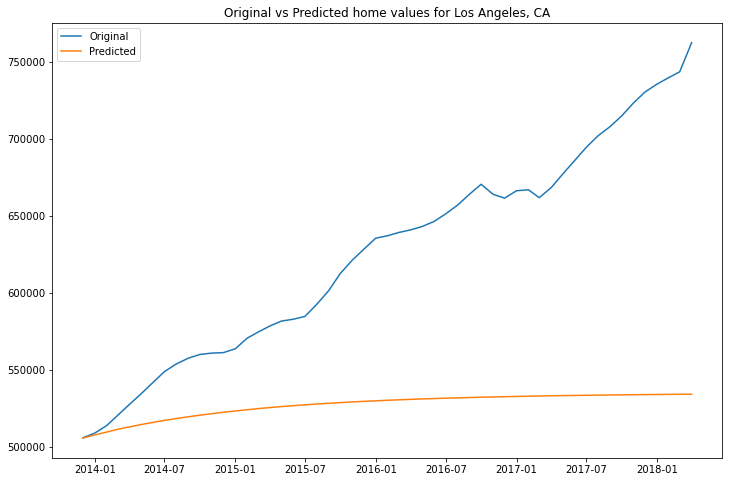

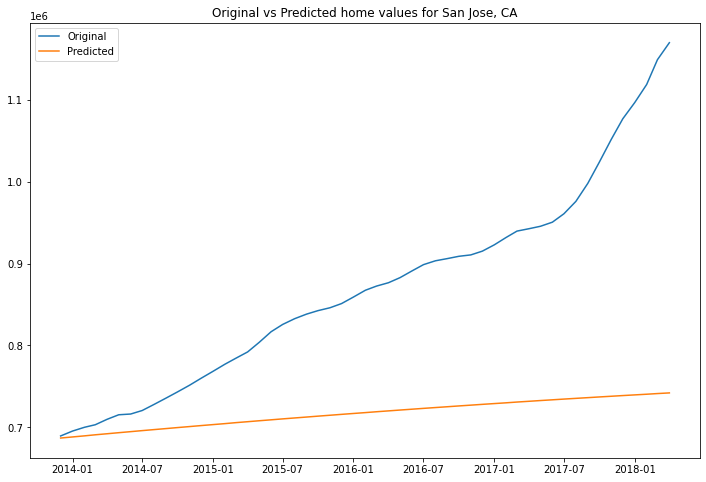

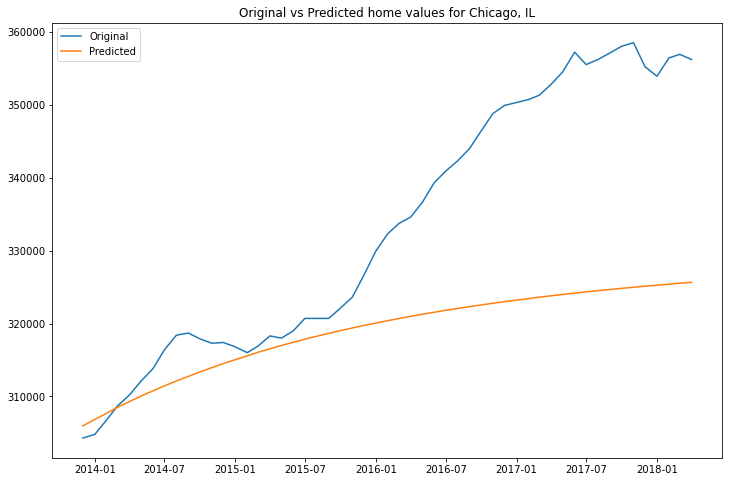

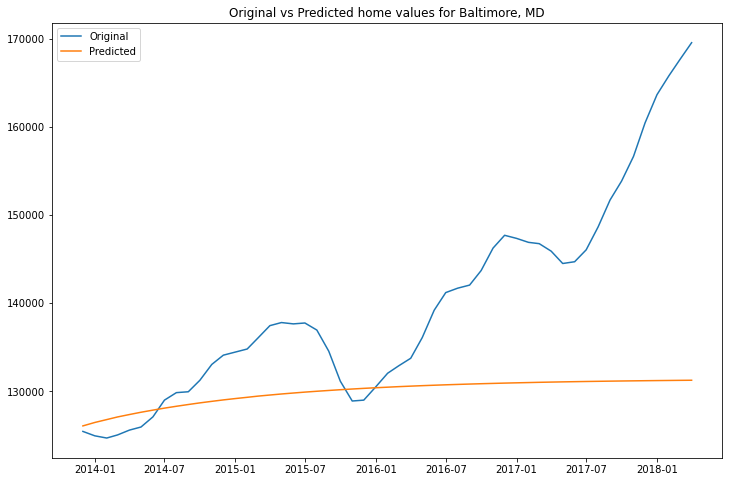

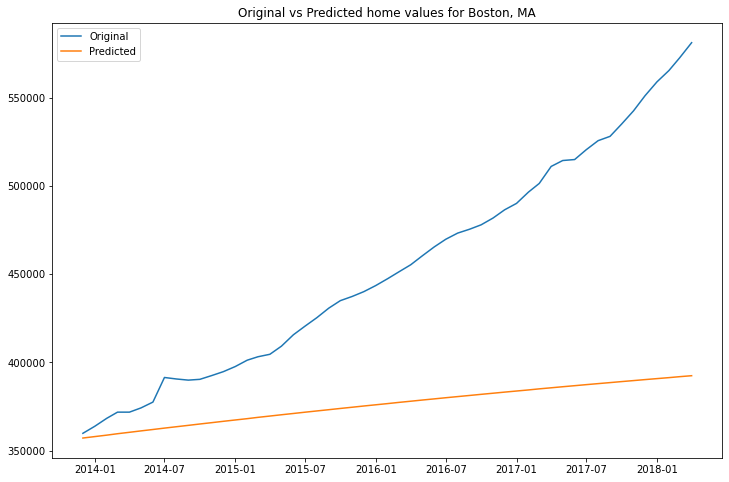

In [54]:
#Not using this model.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,1,2)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1693.096
Date:                Wed, 11 May 2022   AIC                           3396.192
Time:                        13:20:05   BIC                           3412.927
Sample:                    04-01-1996   HQIC                          3402.957
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3021      0.528      2.466      0.014       0.267       2.337
ar.L2         -0.3135      0.524     -0.598      0.550      -1.340       0.713
ma.L1         -1.2539      0.521     -2.404      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1976.615
Date:                Wed, 11 May 2022   AIC                           3963.229
Time:                        13:20:05   BIC                           3979.965
Sample:                    04-01-1996   HQIC                          3969.995
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7817      0.752      1.039      0.299      -0.693       2.256
ar.L2         -0.7655      0.640     -1.195      0.232      -2.021       0.490
ma.L1         -0.7762      0.763     -1.017      0.3

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1924.040
Date:                Wed, 11 May 2022   AIC                           3858.080
Time:                        13:20:07   BIC                           3874.815
Sample:                    04-01-1996   HQIC                          3864.845
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0745      6.315      0.012      0.991     -12.302      12.452
ar.L2          0.6592      5.288      0.125      0.901      -9.705      11.023
ma.L1         -0.1355      6.314     -0.021      0.9

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1753.249
Date:                Wed, 11 May 2022   AIC                           3516.498
Time:                        13:20:08   BIC                           3533.234
Sample:                    04-01-1996   HQIC                          3523.264
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5498      0.119     13.036      0.000       1.317       1.783
ar.L2         -0.8602      0.125     -6.901      0.000      -1.104      -0.616
ma.L1         -1.5396      0.130    -11.878      0.0

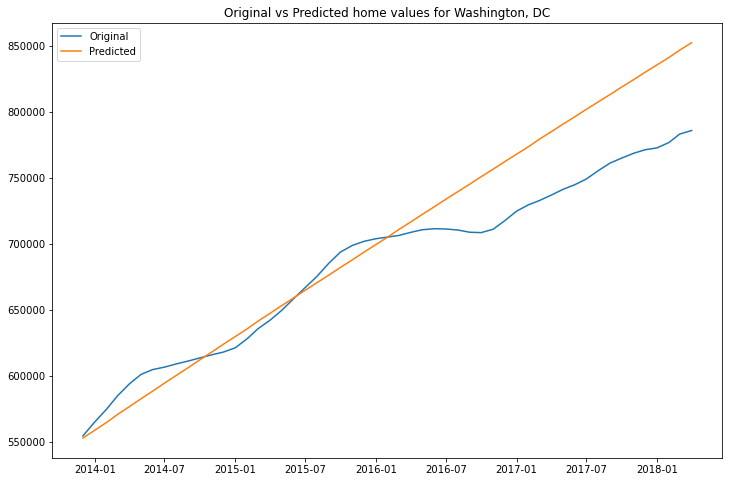

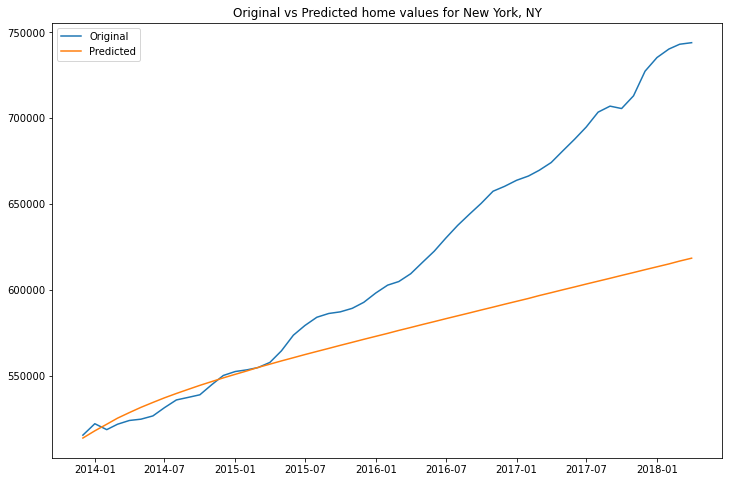

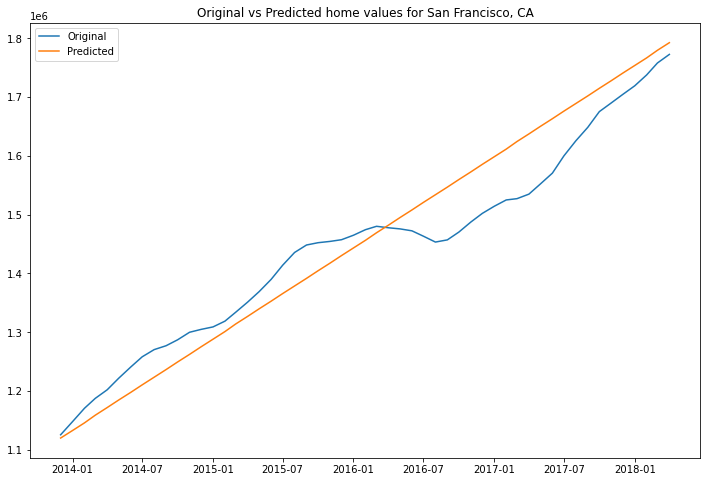

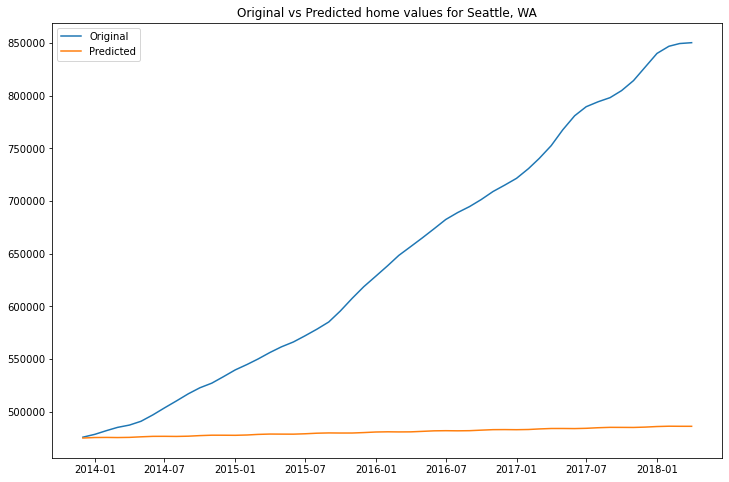

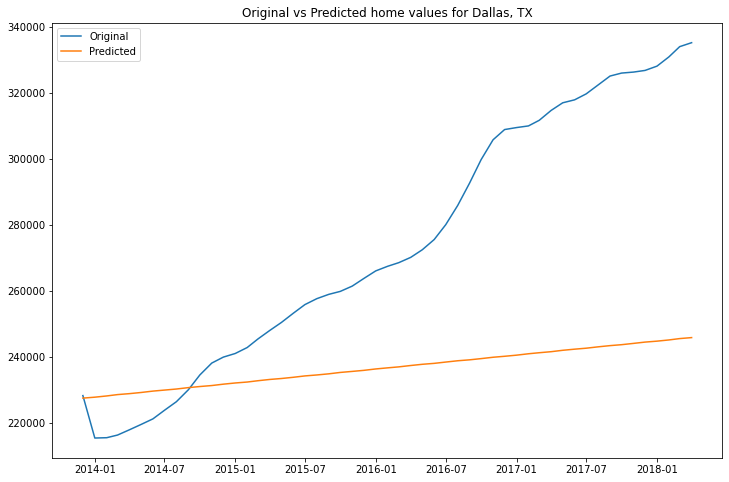

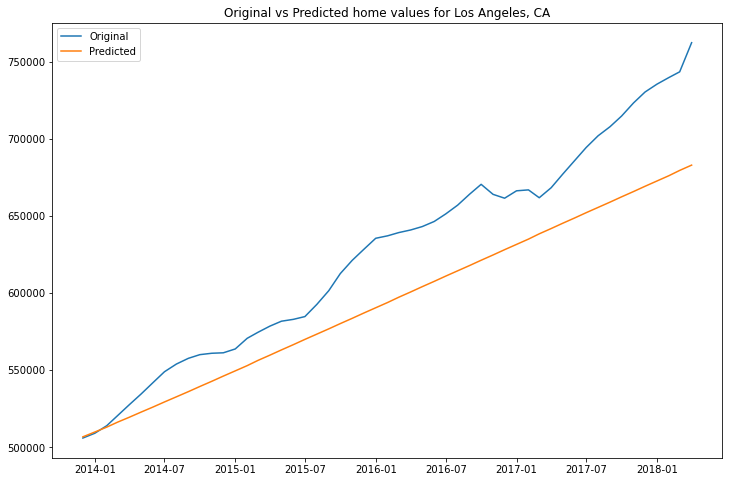

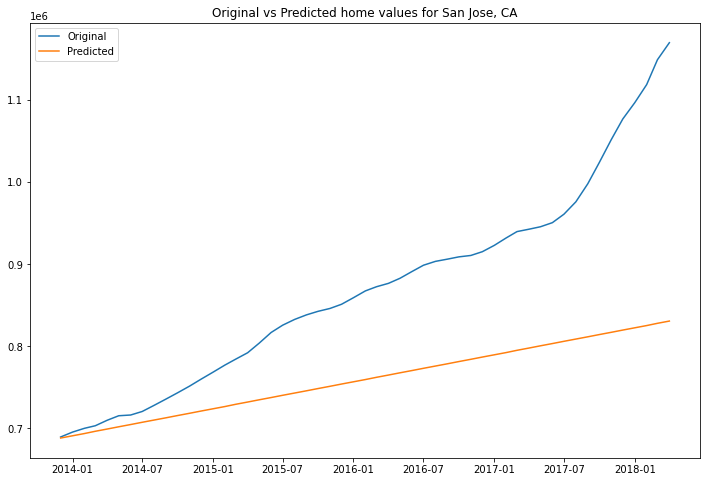

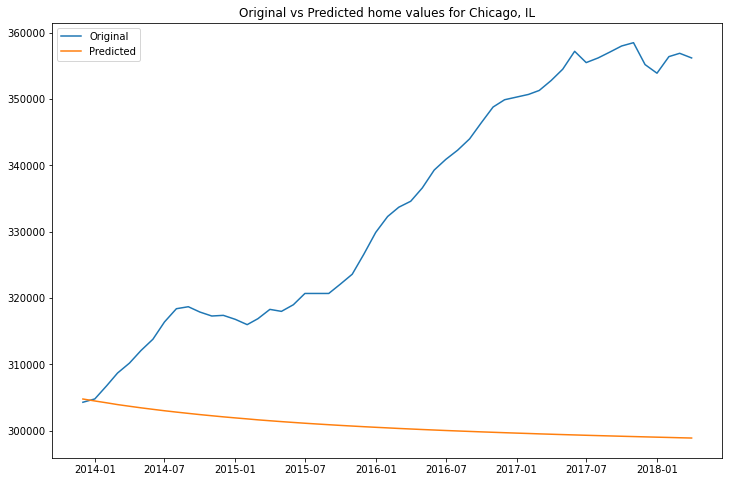

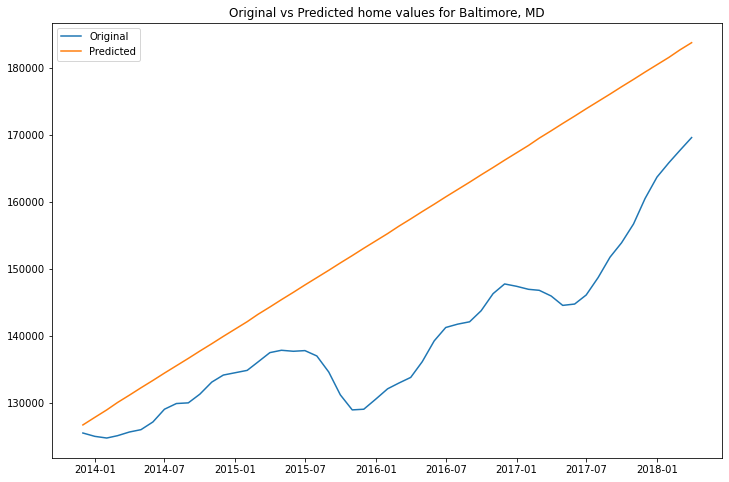

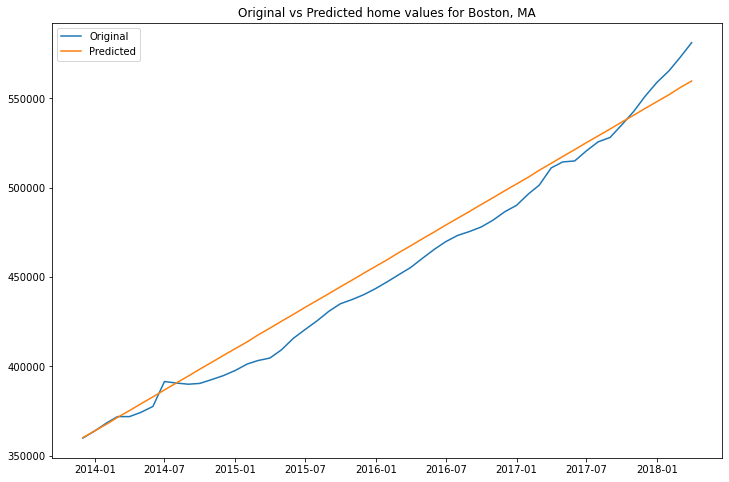

In [55]:
#4 graphs are good.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2, 2, 2)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1694.310
Date:                Wed, 11 May 2022   AIC                           3400.620
Time:                        13:20:10   BIC                           3420.703
Sample:                    04-01-1996   HQIC                          3408.739
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6204     13.927      0.045      0.964     -26.676      27.917
ar.L2          0.3048     13.556      0.022      0.982     -26.265      26.874
ar.L3         -0.0174      0.554     -0.031      0.9

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1965.109
Date:                Wed, 11 May 2022   AIC                           3942.218
Time:                        13:20:11   BIC                           3962.300
Sample:                    04-01-1996   HQIC                          3950.336
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1302      1.244      0.105      0.917      -2.308       2.569
ar.L2          0.6097      1.067      0.572      0.568      -1.481       2.700
ar.L3         -0.0196      0.040     -0.486      0.6

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1976.938
Date:                Wed, 11 May 2022   AIC                           3965.876
Time:                        13:20:12   BIC                           3985.959
Sample:                    04-01-1996   HQIC                          3973.995
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1153      3.072      0.038      0.970      -5.906       6.136
ar.L2          0.8042      2.955      0.272      0.786      -4.988       6.596
ar.L3         -0.0152      0.041     -0.372      0.7

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1923.997
Date:                Wed, 11 May 2022   AIC                           3859.993
Time:                        13:20:13   BIC                           3880.076
Sample:                    04-01-1996   HQIC                          3868.112
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1328      3.549      0.037      0.970      -6.823       7.088
ar.L2          0.5597      3.011      0.186      0.853      -5.342       6.461
ar.L3         -0.0064      0.026     -0.242      0.8

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           San Jose, CA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1874.546
Date:                Wed, 11 May 2022   AIC                           3761.092
Time:                        13:20:13   BIC                           3781.175
Sample:                    04-01-1996   HQIC                          3769.211
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3408      4.717      0.072      0.942      -8.904       9.585
ar.L2          0.5887      4.536      0.130      0.897      -8.301       9.479
ar.L3         -0.0002      0.045     -0.004      0.9

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1723.660
Date:                Wed, 11 May 2022   AIC                           3459.320
Time:                        13:20:14   BIC                           3479.403
Sample:                    04-01-1996   HQIC                          3467.439
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1512      1.312      0.115      0.908      -2.421       2.723
ar.L2          0.7633      1.299      0.588      0.557      -1.782       3.309
ar.L3         -0.0249      0.025     -0.982      0.3

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1611.015
Date:                Wed, 11 May 2022   AIC                           3234.031
Time:                        13:20:14   BIC                           3254.113
Sample:                    04-01-1996   HQIC                          3242.149
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3843      1.070      0.359      0.720      -1.714       2.482
ar.L2          0.1004      0.482      0.208      0.835      -0.844       1.044
ar.L3          0.0144      0.166      0.087      0.9

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1753.164
Date:                Wed, 11 May 2022   AIC                           3518.328
Time:                        13:20:15   BIC                           3538.411
Sample:                    04-01-1996   HQIC                          3526.447
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4200      0.560      2.537      0.011       0.323       2.517
ar.L2         -0.6420      0.482     -1.332      0.183      -1.587       0.303
ar.L3          0.0004      0.055      0.007      0.9

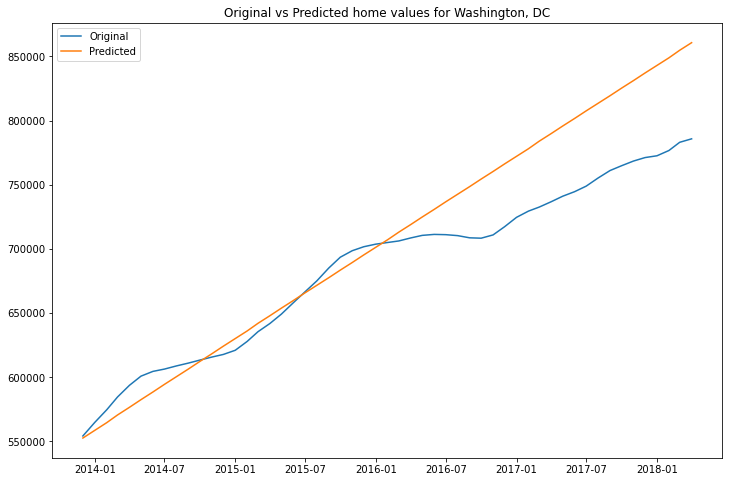

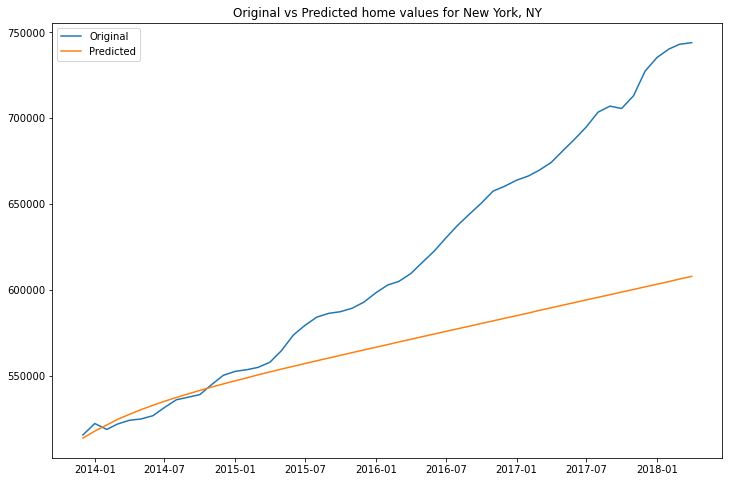

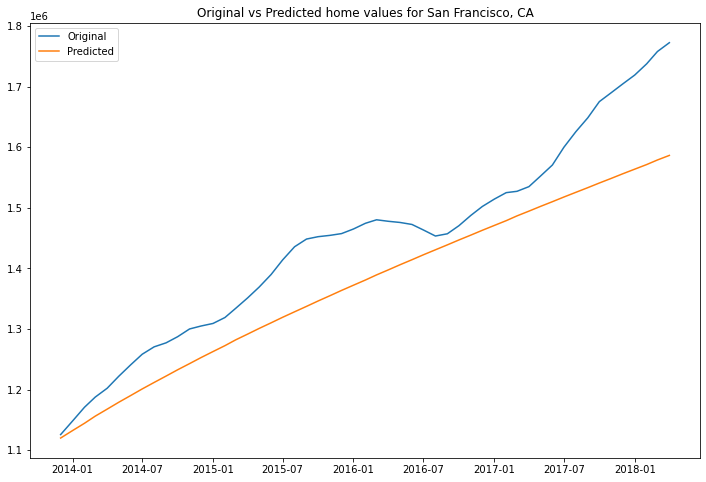

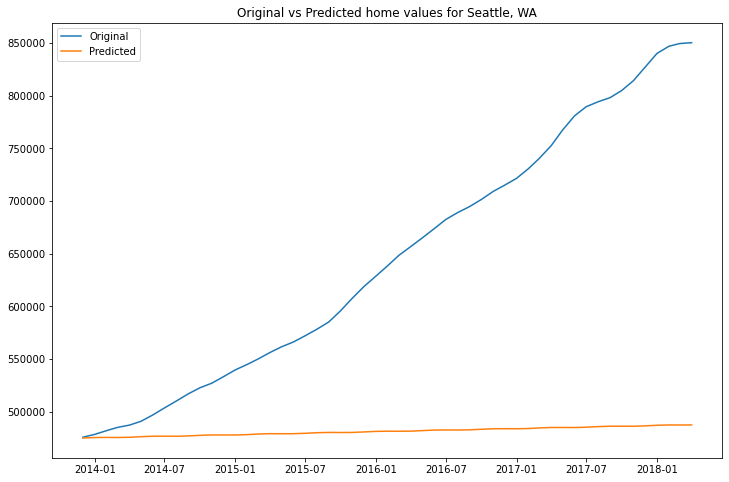

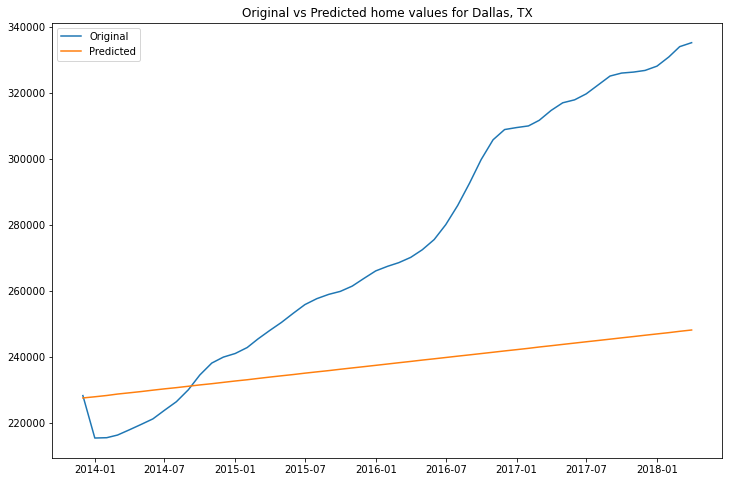

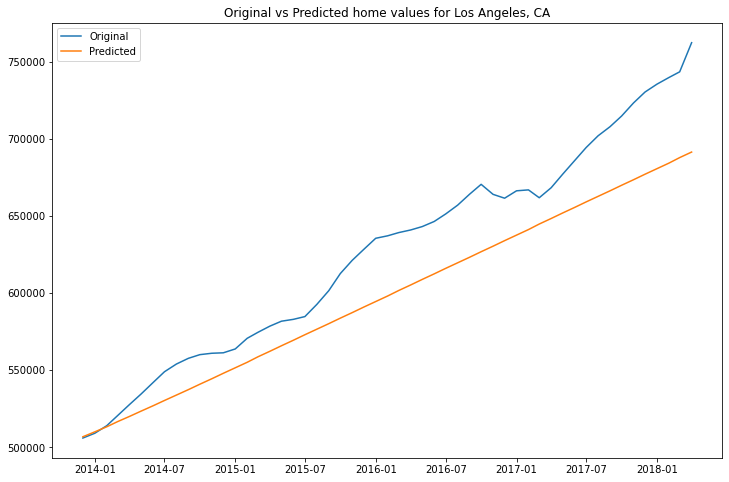

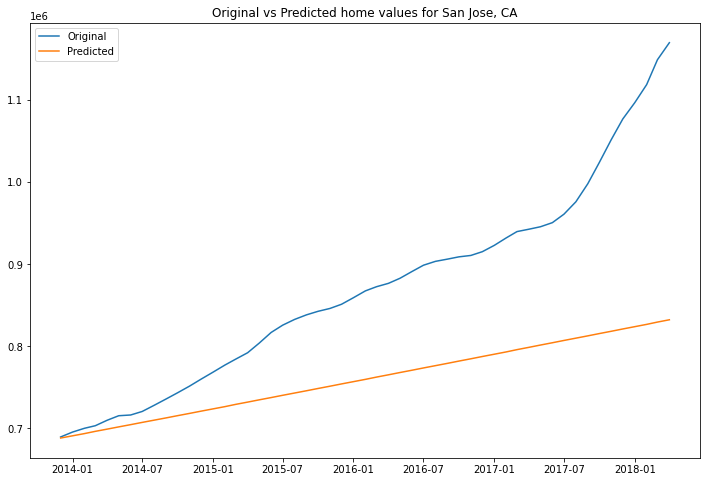

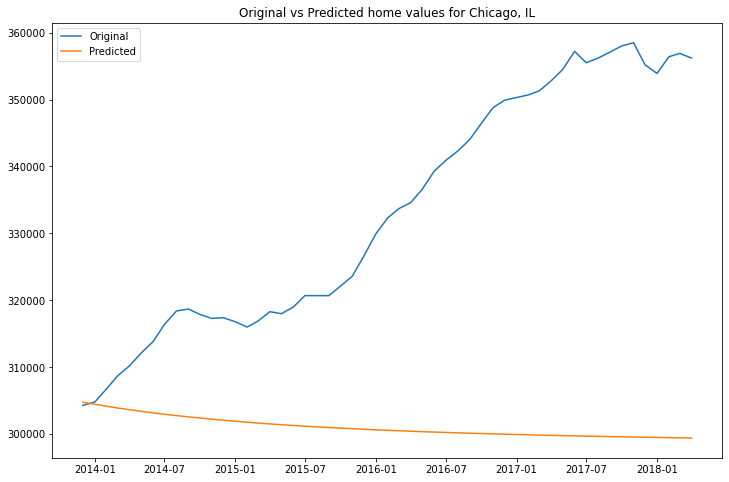

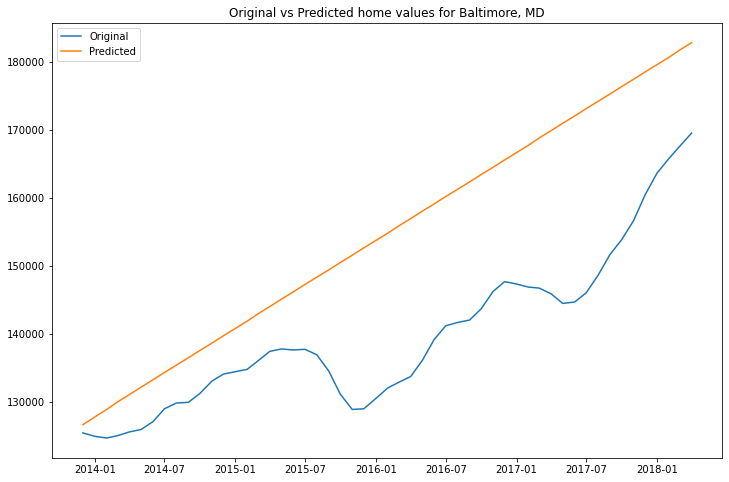

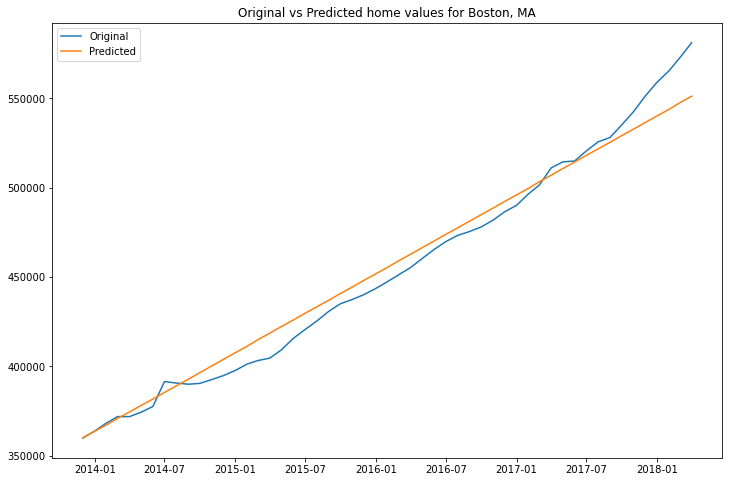

In [56]:
#4 but with an edge. Best Model
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,2,2)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1672.628
Date:                Wed, 11 May 2022   AIC                           3357.256
Time:                        13:20:18   BIC                           3377.310
Sample:                    04-01-1996   HQIC                          3365.364
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1980      0.466      0.425      0.671      -0.716       1.112
ar.L2          0.4107      0.370      1.110      0.267      -0.314       1.135
ar.L3         -0.0730      0.028     -2.629      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1962.053
Date:                Wed, 11 May 2022   AIC                           3936.107
Time:                        13:20:18   BIC                           3956.161
Sample:                    04-01-1996   HQIC                          3944.215
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7503      0.149      5.045      0.000       0.459       1.042
ar.L2         -0.0041      0.068     -0.060      0.953      -0.138       0.129
ar.L3         -0.0245      0.032     -0.770      0.4

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1738.690
Date:                Wed, 11 May 2022   AIC                           3489.379
Time:                        13:20:19   BIC                           3509.433
Sample:                    04-01-1996   HQIC                          3497.487
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2308      0.487     -0.474      0.635      -1.185       0.723
ar.L2          0.6937      0.455      1.524      0.127      -0.198       1.586
ar.L3         -0.0755      0.048     -1.566      0.1

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1540.566
Date:                Wed, 11 May 2022   AIC                           3093.133
Time:                        13:20:20   BIC                           3113.187
Sample:                    04-01-1996   HQIC                          3101.240
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8591      0.173     -4.965      0.000      -1.198      -0.520
ar.L2         -0.7990      0.096     -8.344      0.000      -0.987      -0.611
ar.L3         -0.0692      0.037     -1.872      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1741.636
Date:                Wed, 11 May 2022   AIC                           3495.272
Time:                        13:20:21   BIC                           3515.326
Sample:                    04-01-1996   HQIC                          3503.380
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1874      0.494      0.380      0.704      -0.780       1.155
ar.L2          0.2714      0.332      0.818      0.413      -0.379       0.921
ar.L3         -0.0411      0.028     -1.485      0.1

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 2)   Log Likelihood               -1754.409
Date:                Wed, 11 May 2022   AIC                           3520.818
Time:                        13:20:22   BIC                           3540.872
Sample:                    04-01-1996   HQIC                          3528.926
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2427      0.266      4.680      0.000       0.722       1.763
ar.L2         -0.4548      0.183     -2.490      0.013      -0.813      -0.097
ar.L3         -0.0257      0.080     -0.321      0.7

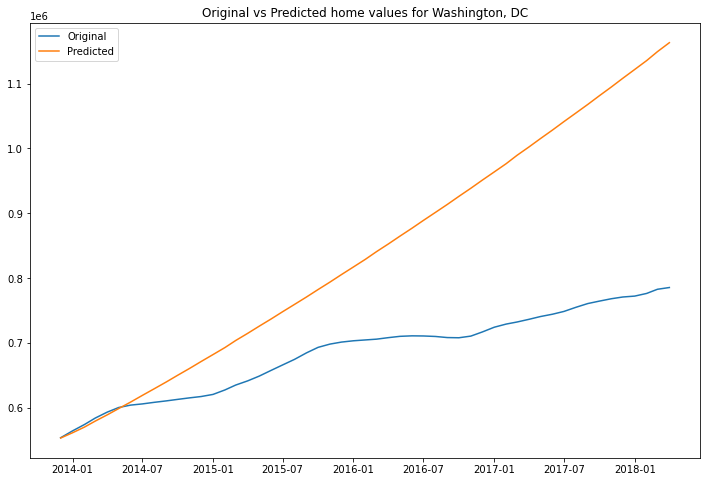

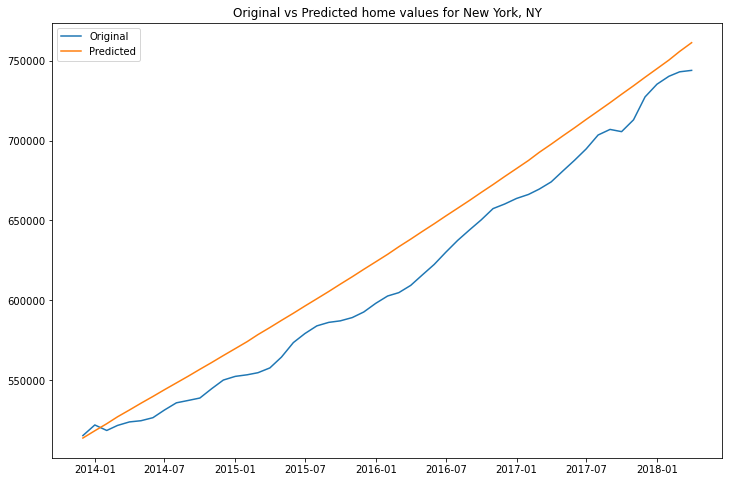

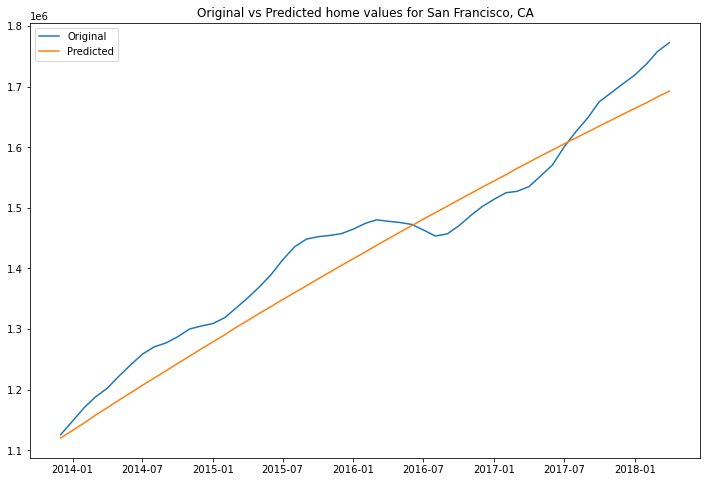

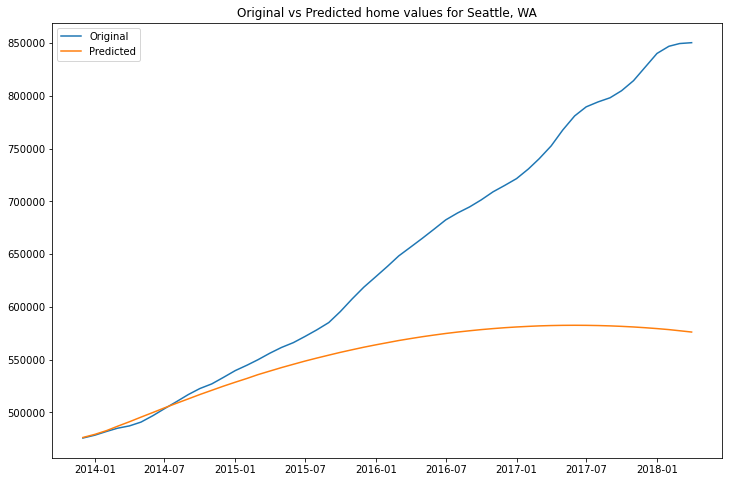

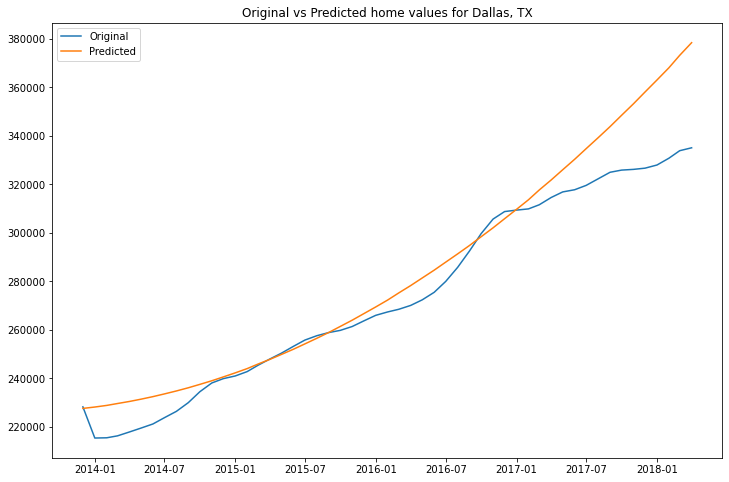

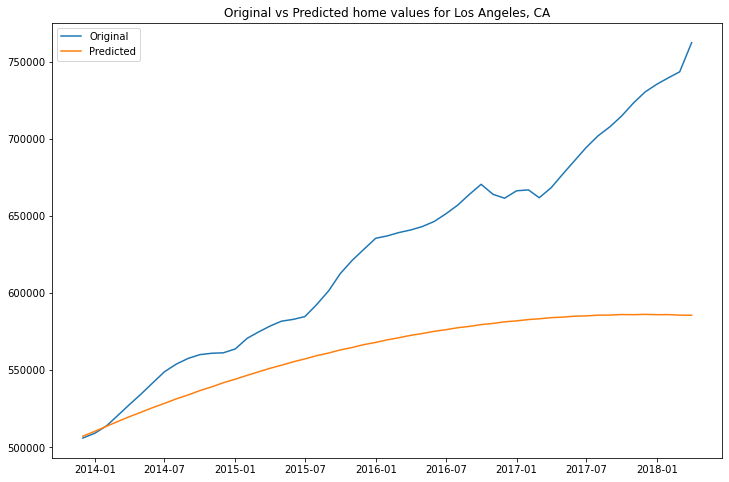

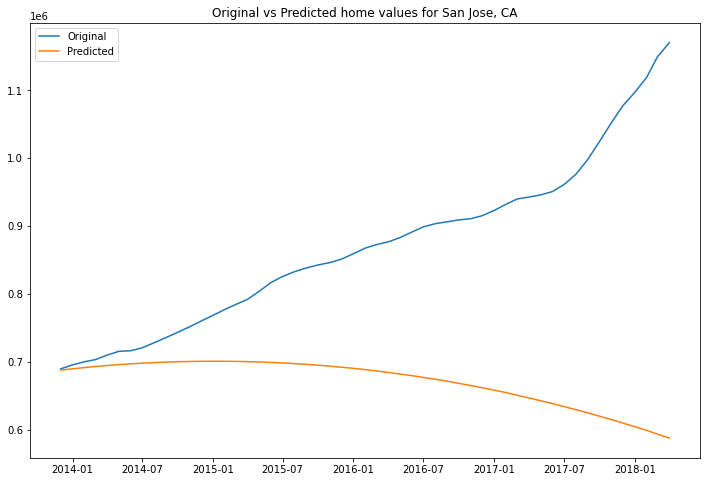

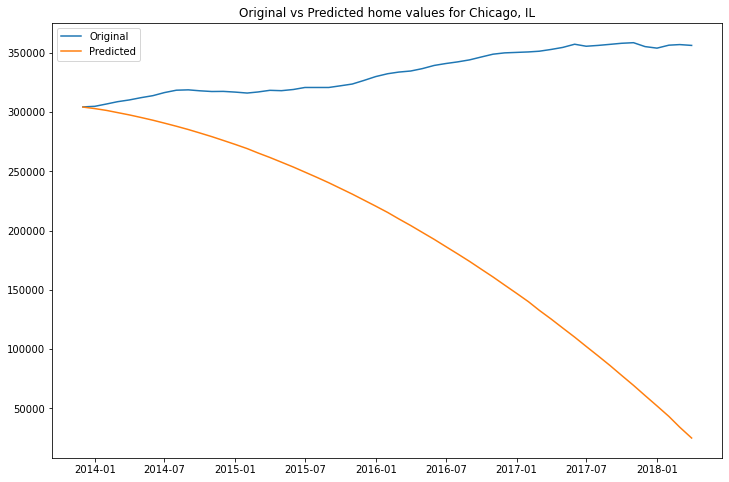

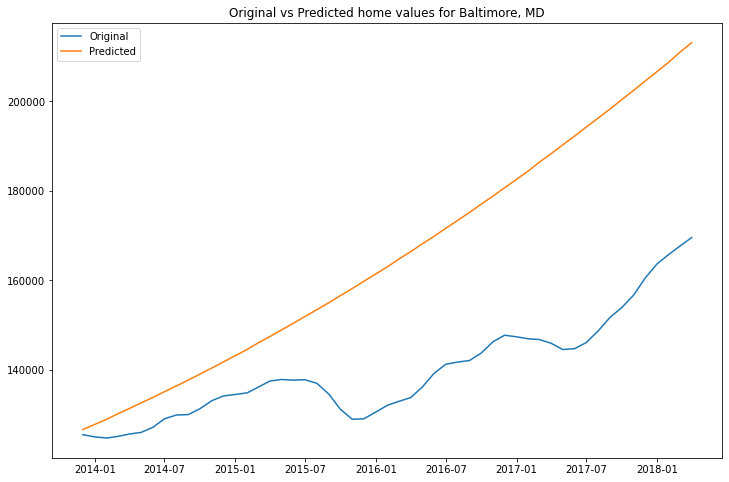

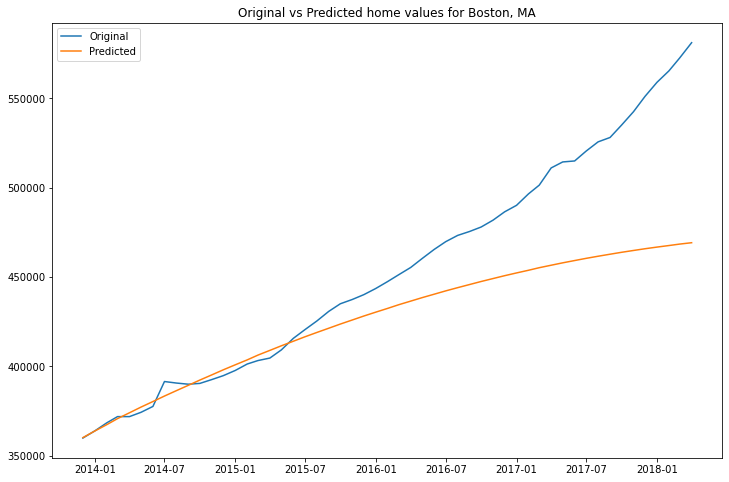

In [57]:
#3 useful graphs 
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,2)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1670.796
Date:                Wed, 11 May 2022   AIC                           3351.592
Time:                        13:20:25   BIC                           3368.304
Sample:                    04-01-1996   HQIC                          3358.349
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5448      0.171      9.057      0.000       1.210       1.879
ar.L2         -0.6567      0.122     -5.373      0.000      -0.896      -0.417
ma.L1         -1.7742      0.177    -10.017      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1966.903
Date:                Wed, 11 May 2022   AIC                           3943.805
Time:                        13:20:25   BIC                           3960.517
Sample:                    04-01-1996   HQIC                          3950.562
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0636      0.065    -16.484      0.000      -1.190      -0.937
ar.L2         -0.0707      0.045     -1.564      0.118      -0.159       0.018
ma.L1         -0.0067      0.062     -0.108      0.9

                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1923.045
Date:                Wed, 11 May 2022   AIC                           3856.090
Time:                        13:20:27   BIC                           3872.801
Sample:                    04-01-1996   HQIC                          3862.846
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1279      0.033    -34.307      0.000      -1.192      -1.063
ar.L2         -0.1279      0.033     -3.883      0.000      -0.192      -0.063
ma.L1         -0.0003      0.158     -0.002      0.9

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(2, 3, 2)   Log Likelihood               -1630.420
Date:                Wed, 11 May 2022   AIC                           3270.839
Time:                        13:20:28   BIC                           3287.551
Sample:                    04-01-1996   HQIC                          3277.596
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2113      0.131      1.607      0.108      -0.046       0.469
ar.L2         -0.0557      0.088     -0.632      0.527      -0.228       0.117
ma.L1         -0.7415      0.139     -5.339      0.0

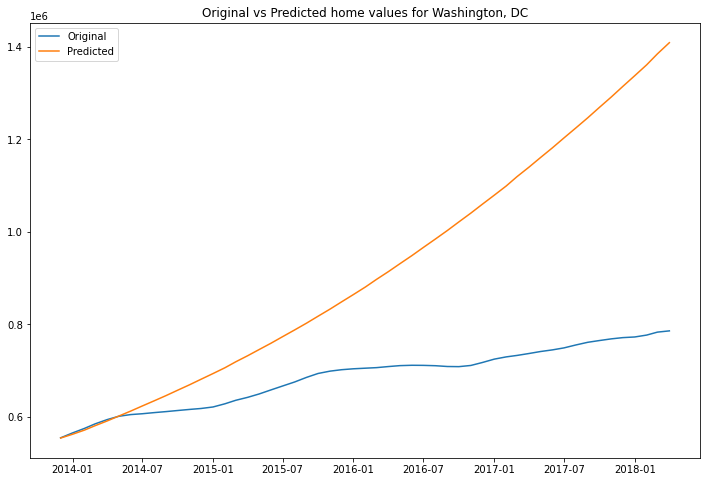

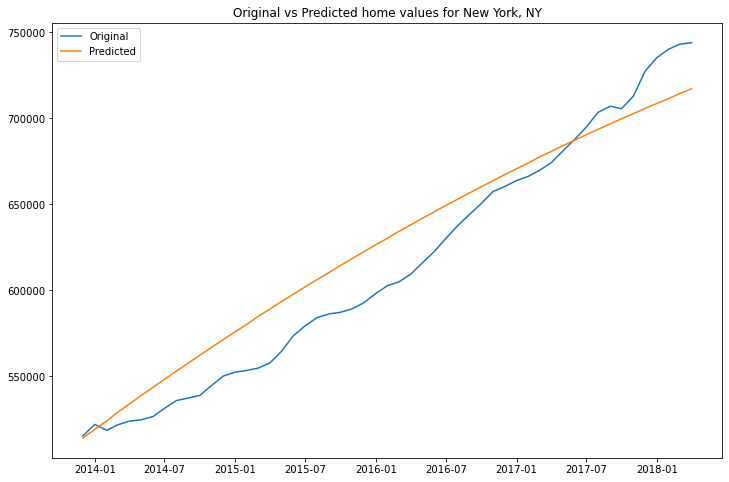

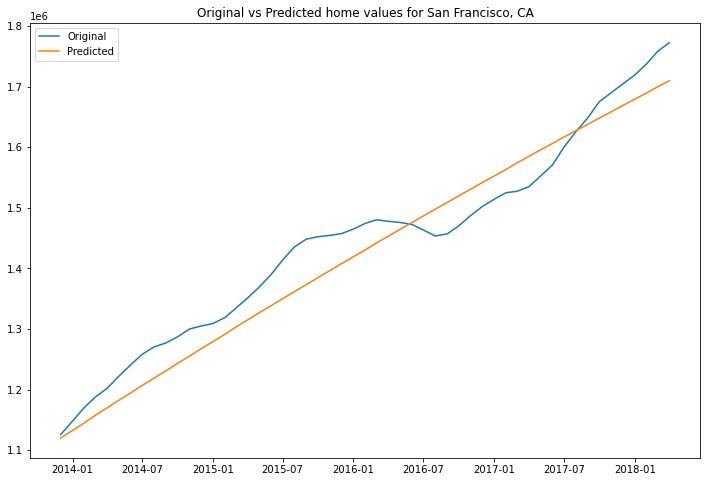

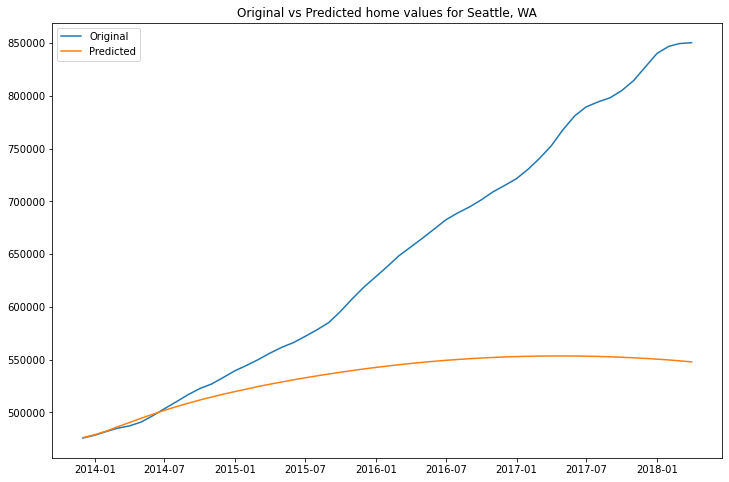

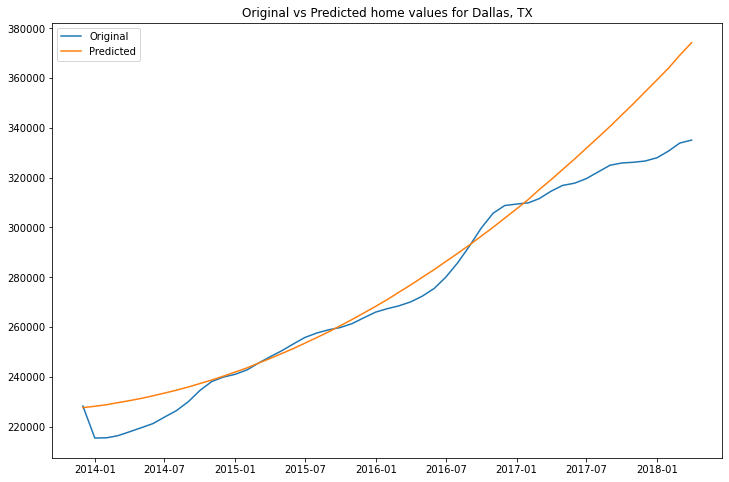

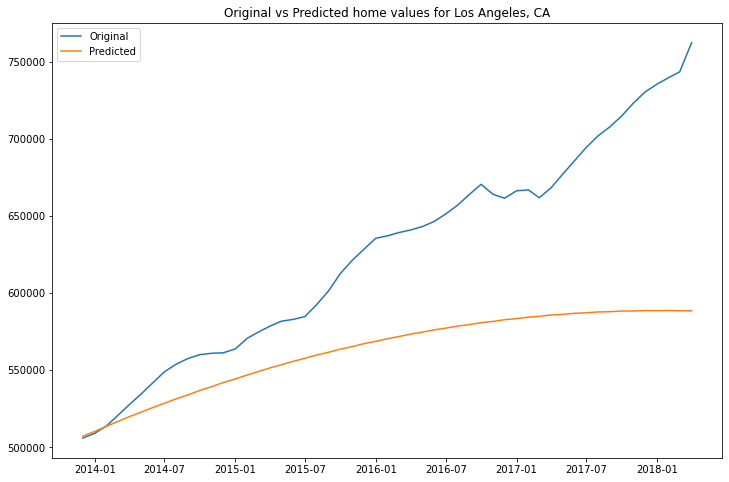

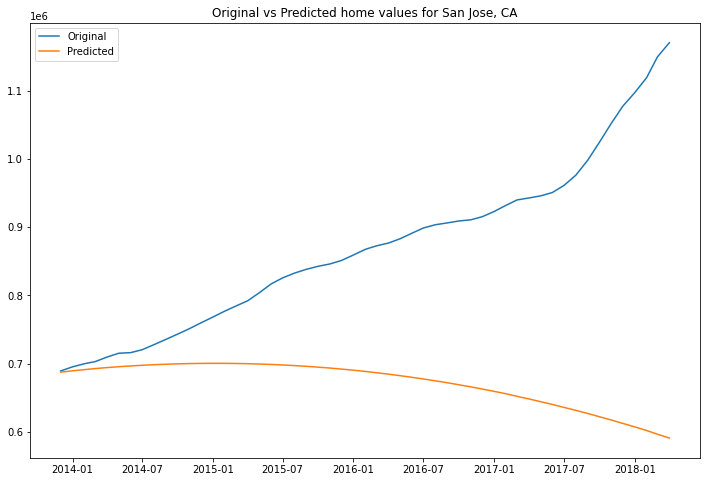

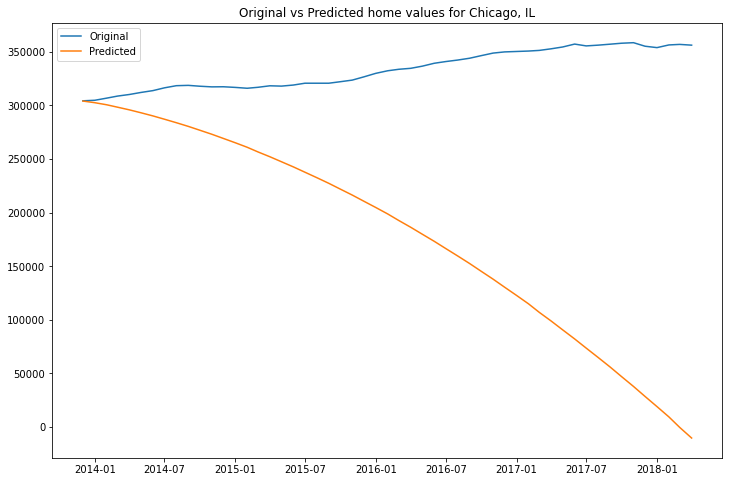

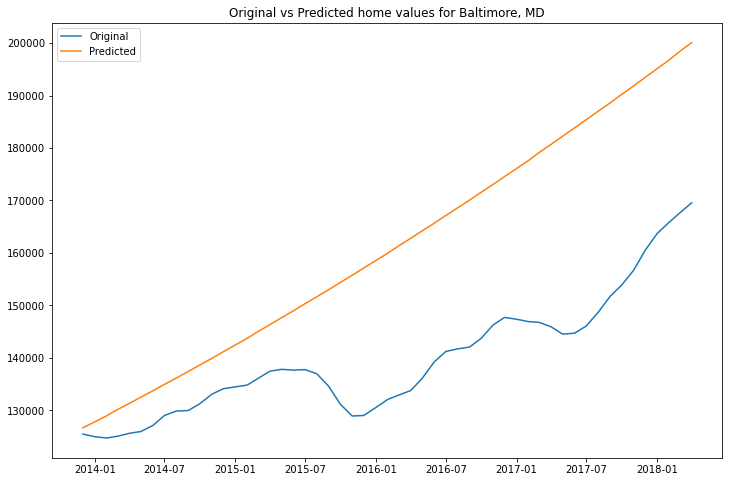

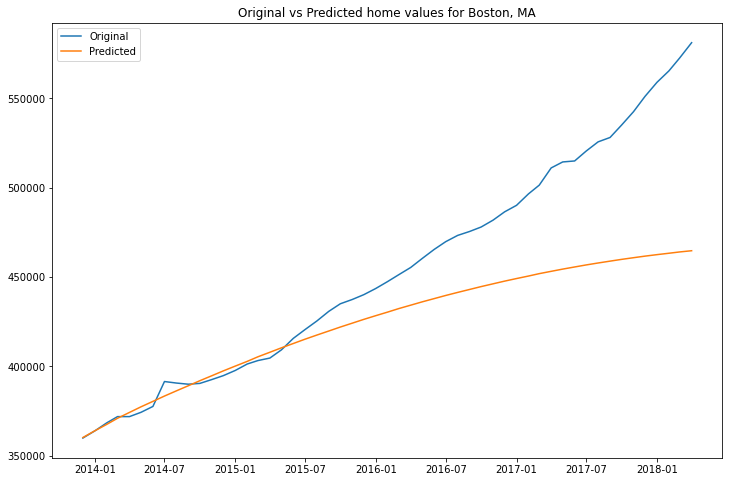

In [58]:
#3 useful graphs
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,3,2)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1664.116
Date:                Wed, 11 May 2022   AIC                           3346.232
Time:                        13:20:32   BIC                           3376.270
Sample:                    04-01-1996   HQIC                          3358.378
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9385      0.080    -11.778      0.000      -1.095      -0.782
ar.L2          0.4799      0.096      4.994      0.000       0.292       0.668
ar.L3          0.4556      0.094      4.841      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -2014.145
Date:                Wed, 11 May 2022   AIC                           4046.290
Time:                        13:20:33   BIC                           4076.328
Sample:                    04-01-1996   HQIC                          4058.436
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6623     10.538     -0.063      0.950     -21.316      19.992
ar.L2         -0.4683      2.188     -0.214      0.831      -4.758       3.821
ar.L3         -1.0471      6.831     -0.153      0.8

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:      San Francisco, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1994.800
Date:                Wed, 11 May 2022   AIC                           4007.599
Time:                        13:20:34   BIC                           4037.637
Sample:                    04-01-1996   HQIC                          4019.745
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9657      3.868     -0.508      0.611      -9.548       5.616
ar.L2         -1.6849      6.111     -0.276      0.783     -13.663      10.293
ar.L3         -0.5989      3.963     -0.151      0.8

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1742.320
Date:                Wed, 11 May 2022   AIC                           3502.640
Time:                        13:20:37   BIC                           3532.678
Sample:                    04-01-1996   HQIC                          3514.786
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5301      1.792     -0.296      0.767      -4.043       2.983
ar.L2         -0.3827      0.824     -0.464      0.642      -1.998       1.233
ar.L3         -0.7991      1.465     -0.545      0.5

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1604.476
Date:                Wed, 11 May 2022   AIC                           3226.951
Time:                        13:20:38   BIC                           3256.989
Sample:                    04-01-1996   HQIC                          3239.097
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1483      0.344     -3.339      0.001      -1.822      -0.474
ar.L2         -0.8614      0.149     -5.783      0.000      -1.153      -0.569
ar.L3         -0.1715      0.224     -0.765      0.4

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1965.983
Date:                Wed, 11 May 2022   AIC                           3949.966
Time:                        13:20:38   BIC                           3980.004
Sample:                    04-01-1996   HQIC                          3962.112
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.5932     29.334     -0.088      0.930     -60.088      54.901
ar.L2         -3.0375     53.628     -0.057      0.955    -108.146     102.071
ar.L3         -1.8428     49.171     -0.037      0.9

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           San Jose, CA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1915.784
Date:                Wed, 11 May 2022   AIC                           3849.569
Time:                        13:20:39   BIC                           3879.607
Sample:                    04-01-1996   HQIC                          3861.715
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4856      6.774      0.072      0.943     -12.791      13.763
ar.L2          0.6759      9.397      0.072      0.943     -17.742      19.094
ar.L3         -0.7710      3.911     -0.197      0.8

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1735.549
Date:                Wed, 11 May 2022   AIC                           3489.098
Time:                        13:20:40   BIC                           3519.136
Sample:                    04-01-1996   HQIC                          3501.244
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3482      0.080    -16.897      0.000      -1.505      -1.192
ar.L2          0.1931      0.116      1.662      0.097      -0.035       0.421
ar.L3          0.6836      0.125      5.465      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1625.461
Date:                Wed, 11 May 2022   AIC                           3268.922
Time:                        13:20:41   BIC                           3298.960
Sample:                    04-01-1996   HQIC                          3281.068
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1394      0.052    -21.708      0.000      -1.242      -1.037
ar.L2         -0.4871      0.095     -5.128      0.000      -0.673      -0.301
ar.L3          0.1527      0.095      1.606      0.1

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(4, 4, 4)   Log Likelihood               -1779.120
Date:                Wed, 11 May 2022   AIC                           3576.239
Time:                        13:20:42   BIC                           3606.277
Sample:                    04-01-1996   HQIC                          3588.385
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4226     24.534     -0.058      0.954     -49.509      46.663
ar.L2         -1.4729     12.236     -0.120      0.904     -25.454      22.509
ar.L3         -1.1325     24.844     -0.046      0.9

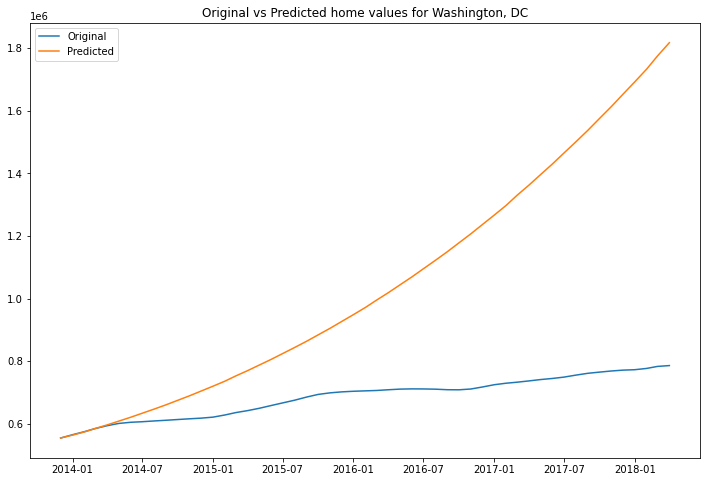

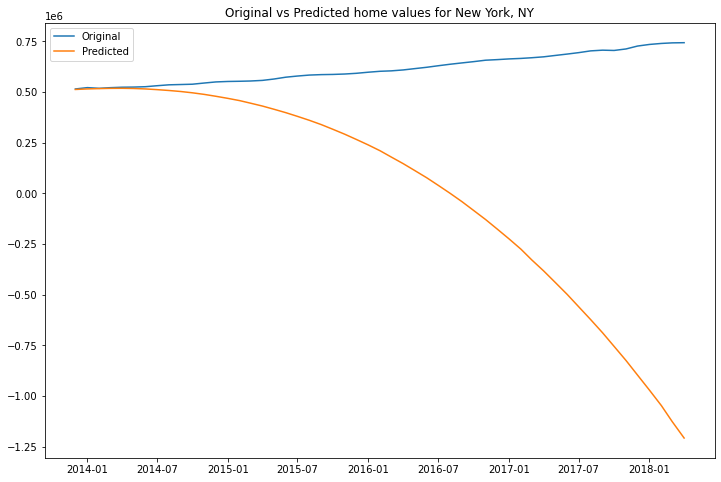

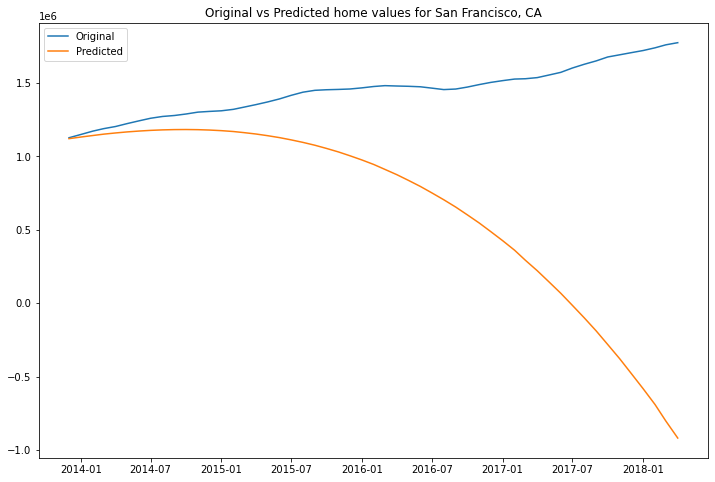

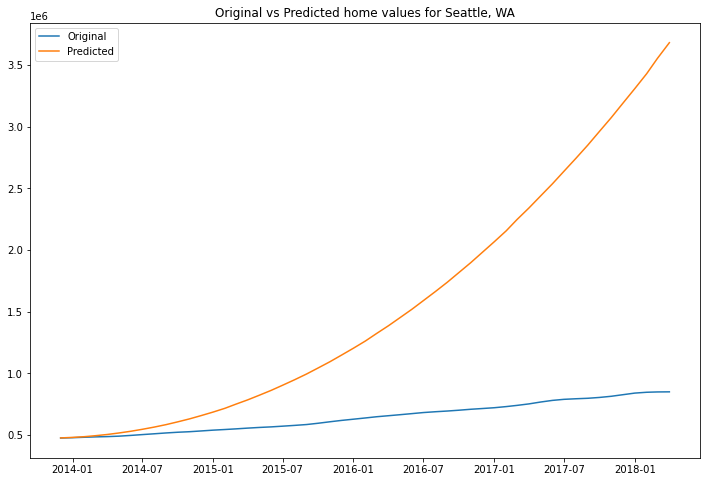

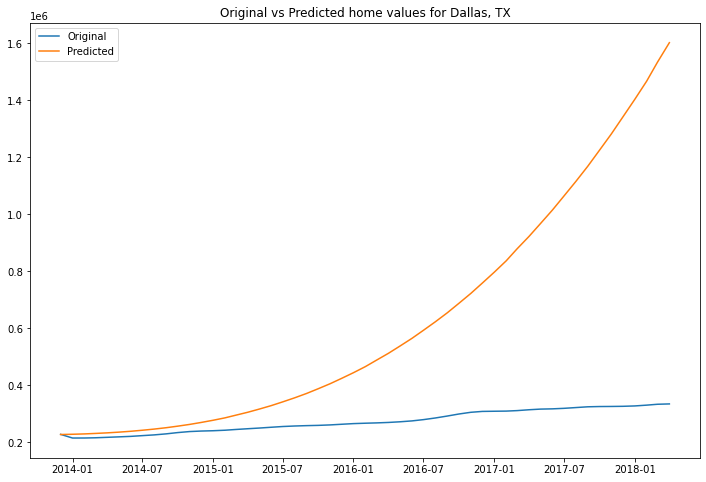

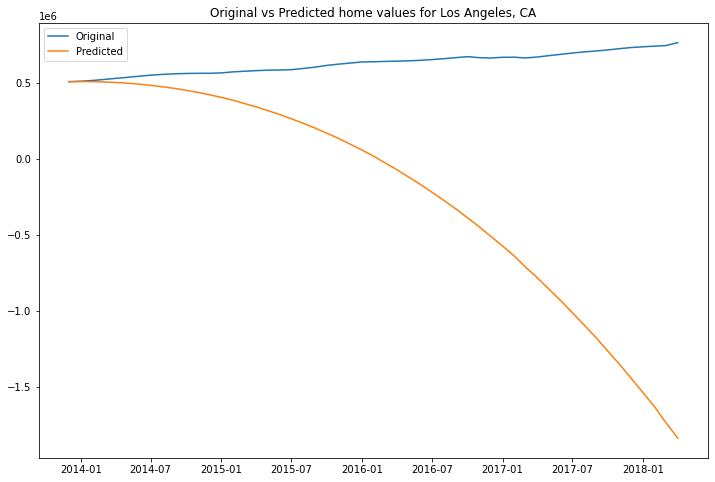

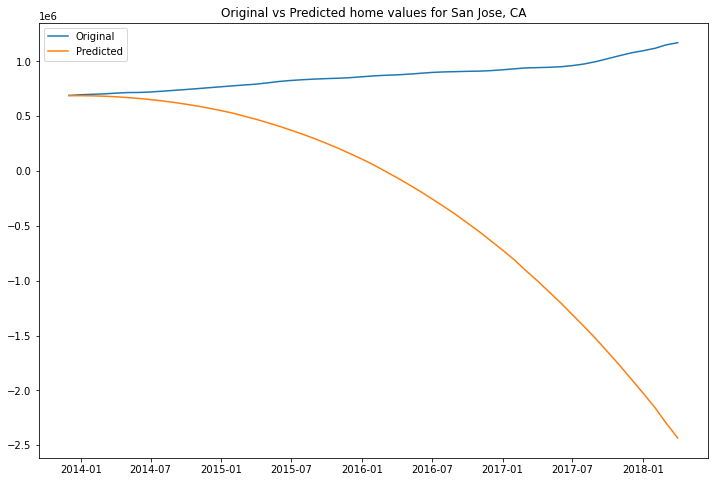

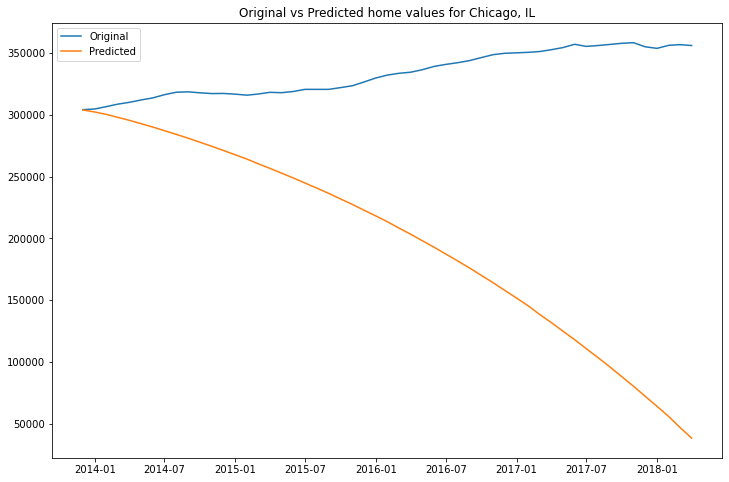

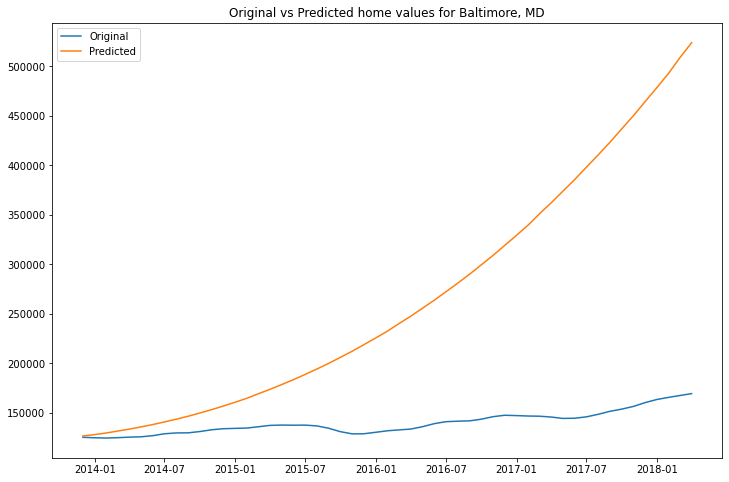

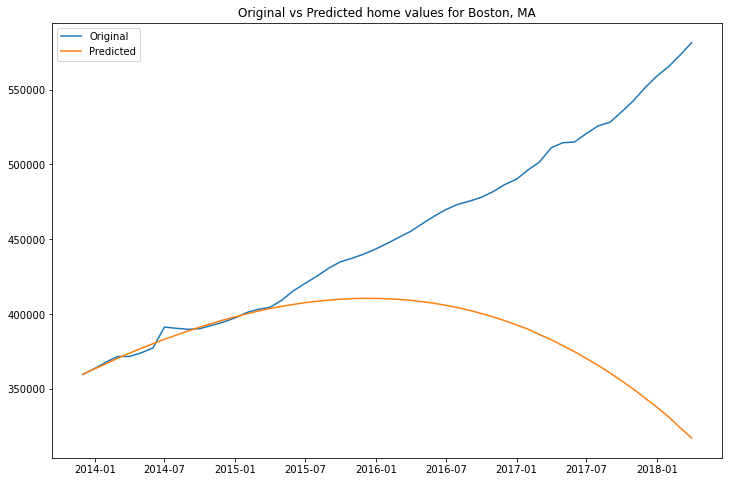

In [59]:
#not using this one
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 4,4,4)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1673.298
Date:                Wed, 11 May 2022   AIC                           3360.597
Time:                        13:20:46   BIC                           3383.993
Sample:                    04-01-1996   HQIC                          3370.056
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4128      0.184      2.240      0.025       0.052       0.774
ar.L2          0.8406      0.054     15.696      0.000       0.736       0.946
ar.L3         -0.5641      0.139     -4.047      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1967.267
Date:                Wed, 11 May 2022   AIC                           3948.533
Time:                        13:20:47   BIC                           3971.930
Sample:                    04-01-1996   HQIC                          3957.993
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5470      1.160     -1.334      0.182      -3.820       0.726
ar.L2         -0.9916      1.215     -0.816      0.415      -3.373       1.390
ar.L3         -0.0587      0.077     -0.760      0.4

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1544.093
Date:                Wed, 11 May 2022   AIC                           3102.186
Time:                        13:20:49   BIC                           3125.582
Sample:                    04-01-1996   HQIC                          3111.645
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2574      0.083      3.095      0.002       0.094       0.420
ar.L2         -0.2345      0.068     -3.431      0.001      -0.368      -0.101
ar.L3          0.8547      0.069     12.380      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1924.674
Date:                Wed, 11 May 2022   AIC                           3863.347
Time:                        13:20:50   BIC                           3886.743
Sample:                    04-01-1996   HQIC                          3872.806
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8042      5.084     -0.355      0.723     -11.769       8.160
ar.L2         -0.9808      4.885     -0.201      0.841     -10.556       8.594
ar.L3         -0.1015      0.582     -0.174      0.8

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          Baltimore, MD   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1630.098
Date:                Wed, 11 May 2022   AIC                           3274.195
Time:                        13:20:52   BIC                           3297.591
Sample:                    04-01-1996   HQIC                          3283.654
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8049      0.282      2.856      0.004       0.253       1.357
ar.L2          0.0209      0.251      0.083      0.934      -0.471       0.513
ar.L3         -0.0875      0.107     -0.817      0.4

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 3)   Log Likelihood               -1753.982
Date:                Wed, 11 May 2022   AIC                           3521.963
Time:                        13:20:52   BIC                           3545.360
Sample:                    04-01-1996   HQIC                          3531.423
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3986      0.115      3.453      0.001       0.172       0.625
ar.L2          0.8464      0.110      7.700      0.000       0.631       1.062
ar.L3         -0.5364      0.066     -8.115      0.0

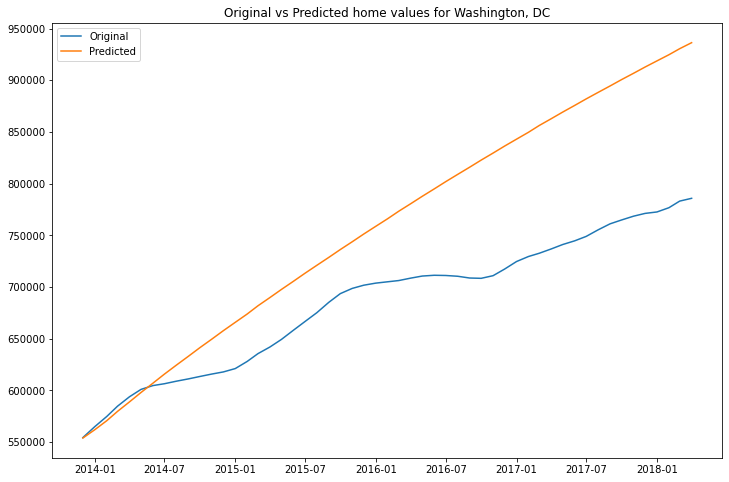

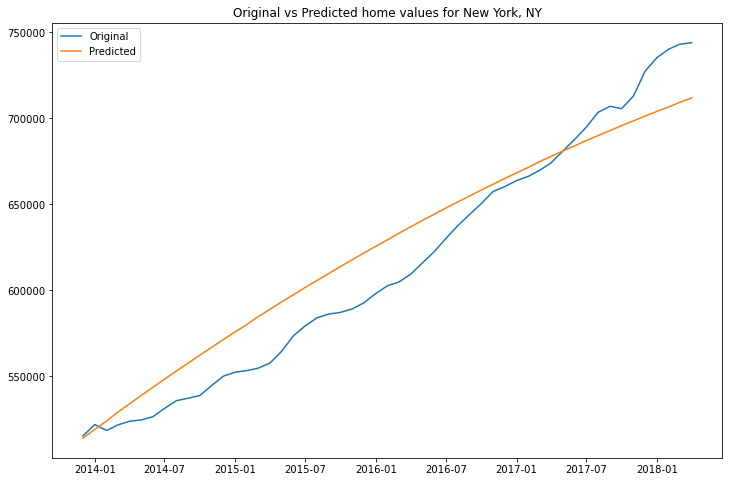

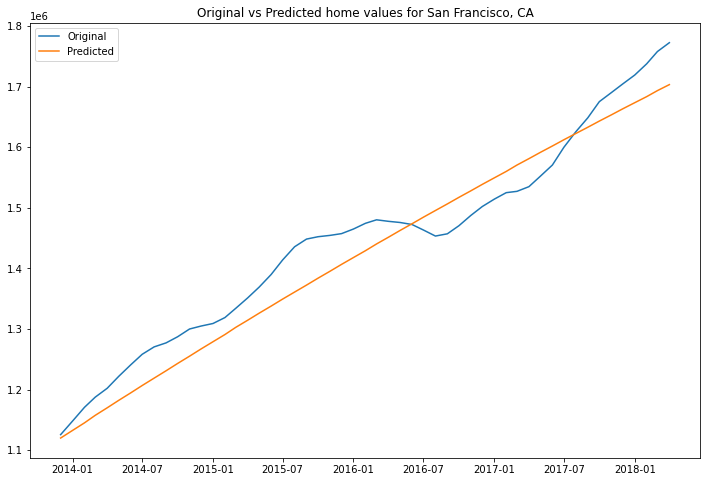

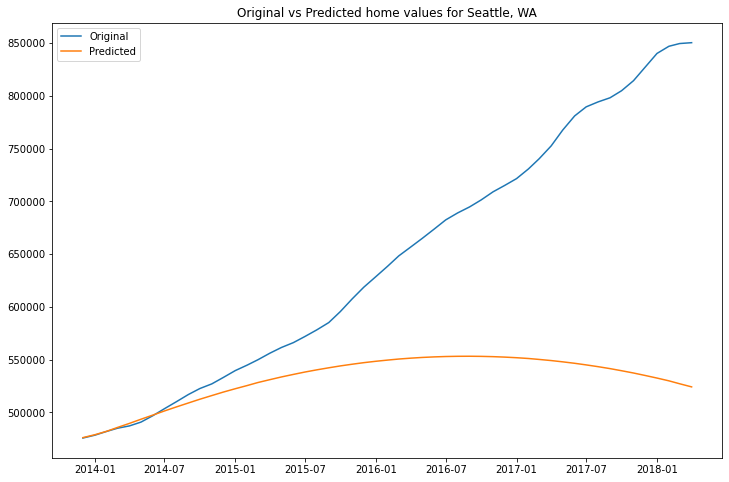

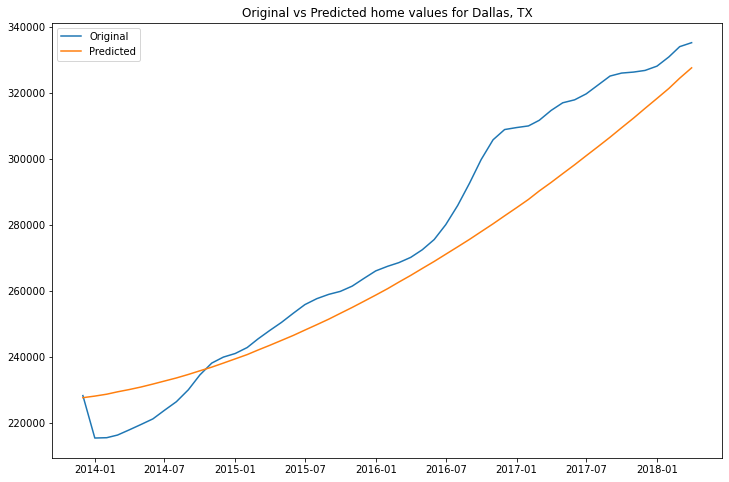

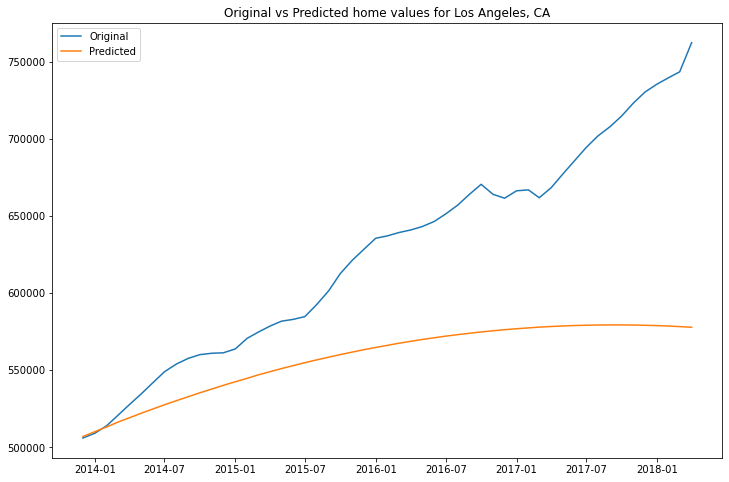

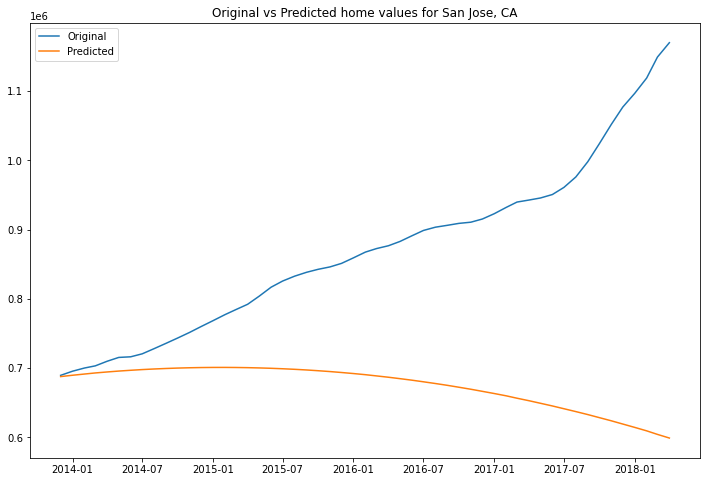

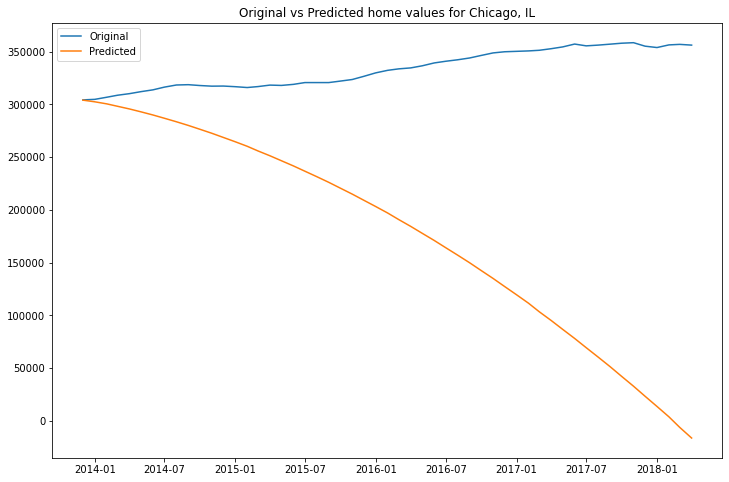

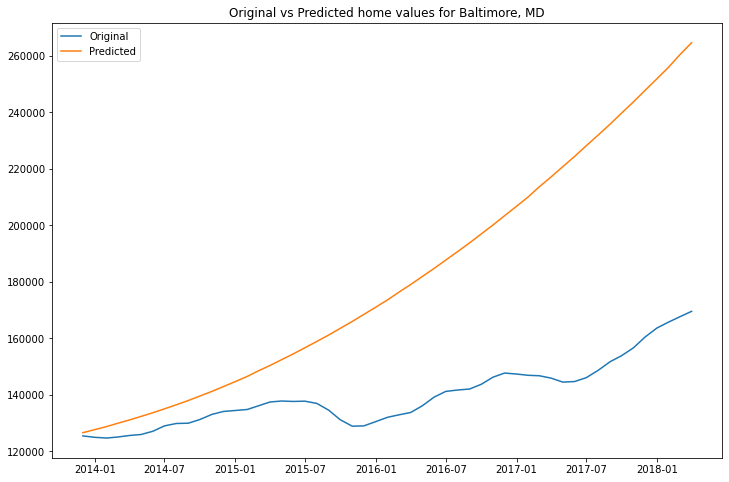

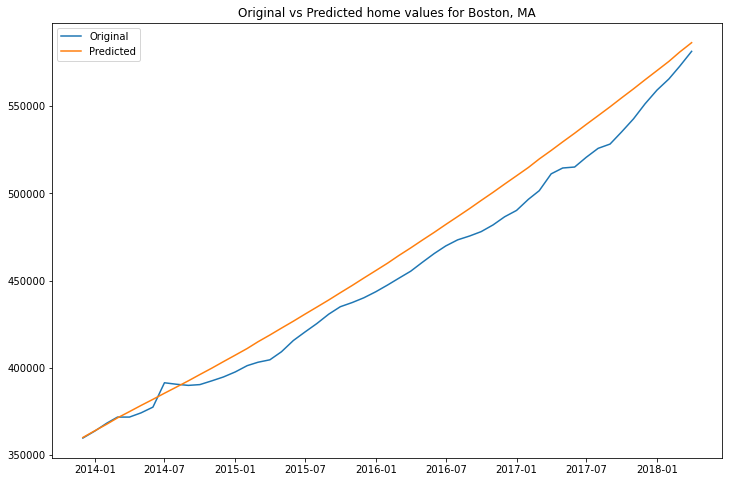

In [60]:
#4 useful graphs
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,3)
    city_model.plot(test)

                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1672.958
Date:                Wed, 11 May 2022   AIC                           3361.917
Time:                        13:20:56   BIC                           3388.656
Sample:                    04-01-1996   HQIC                          3372.727
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2743      1.220     -0.225      0.822      -2.665       2.116
ar.L2          0.6006      0.241      2.489      0.013       0.128       1.073
ar.L3          0.0071      0.597      0.012      0.9

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1963.870
Date:                Wed, 11 May 2022   AIC                           3943.740
Time:                        13:20:57   BIC                           3970.479
Sample:                    04-01-1996   HQIC                          3954.551
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0349      0.189     -5.465      0.000      -1.406      -0.664
ar.L2         -1.0648      0.035    -30.601      0.000      -1.133      -0.997
ar.L3         -0.9615      0.189     -5.083      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1543.367
Date:                Wed, 11 May 2022   AIC                           3102.734
Time:                        13:20:59   BIC                           3129.473
Sample:                    04-01-1996   HQIC                          3113.545
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3200      0.511     -0.626      0.531      -1.322       0.682
ar.L2         -0.6331      0.384     -1.648      0.099      -1.386       0.120
ar.L3          0.3915      0.479      0.817      0.4

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1925.604
Date:                Wed, 11 May 2022   AIC                           3867.208
Time:                        13:20:59   BIC                           3893.947
Sample:                    04-01-1996   HQIC                          3878.019
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7274      1.498     -1.153      0.249      -4.663       1.208
ar.L2         -0.8808      1.655     -0.532      0.595      -4.125       2.363
ar.L3         -0.0403      0.221     -0.183      0.8

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(3, 3, 4)   Log Likelihood               -1758.257
Date:                Wed, 11 May 2022   AIC                           3532.513
Time:                        13:21:02   BIC                           3559.252
Sample:                    04-01-1996   HQIC                          3543.324
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6875      0.182     -3.780      0.000      -1.044      -0.331
ar.L2         -0.3751      0.180     -2.087      0.037      -0.727      -0.023
ar.L3          0.4559      0.119      3.820      0.0

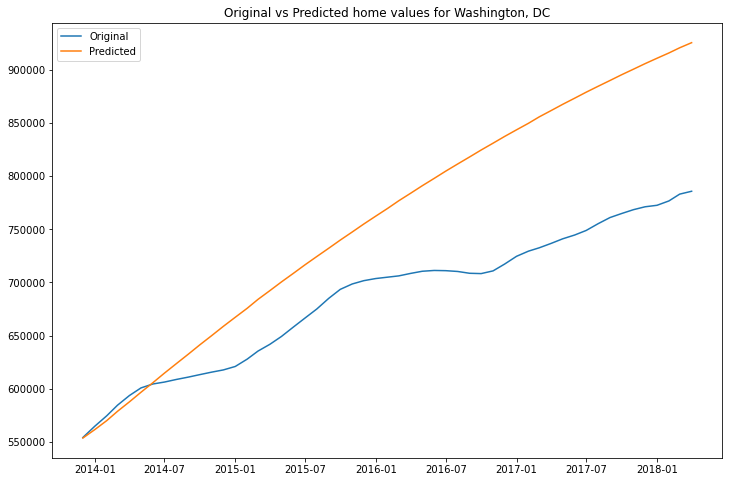

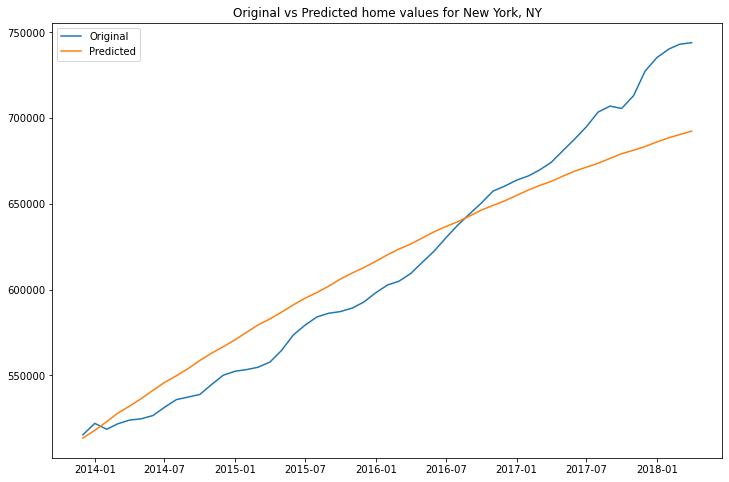

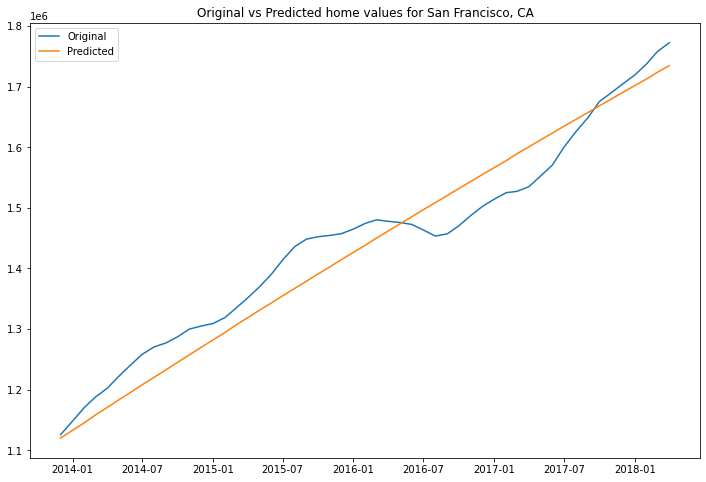

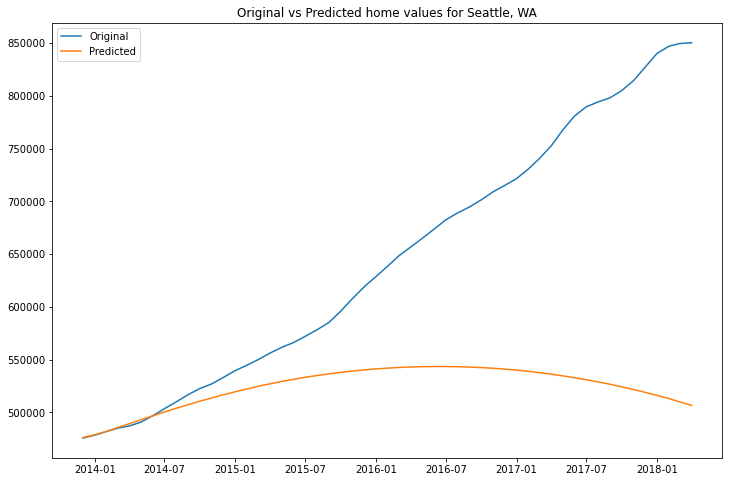

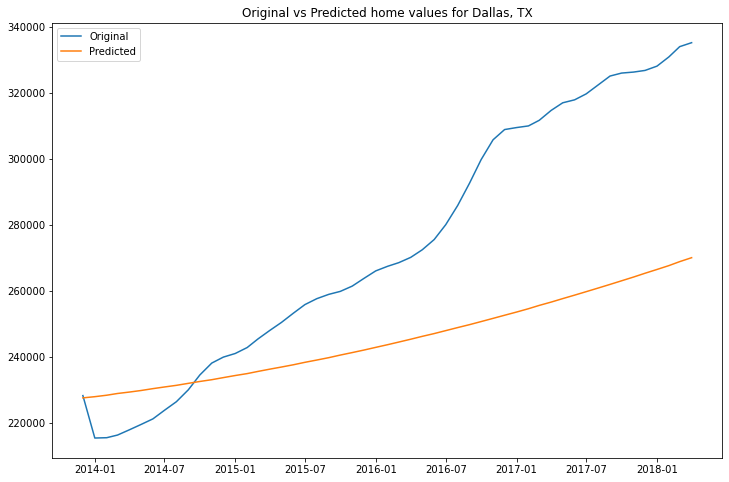

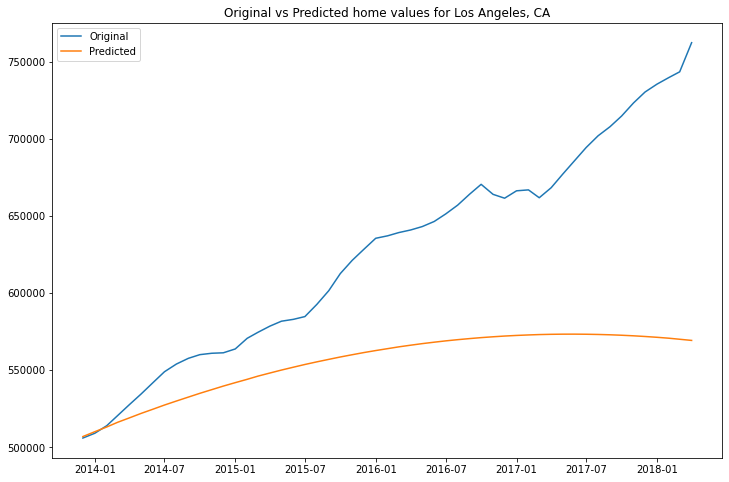

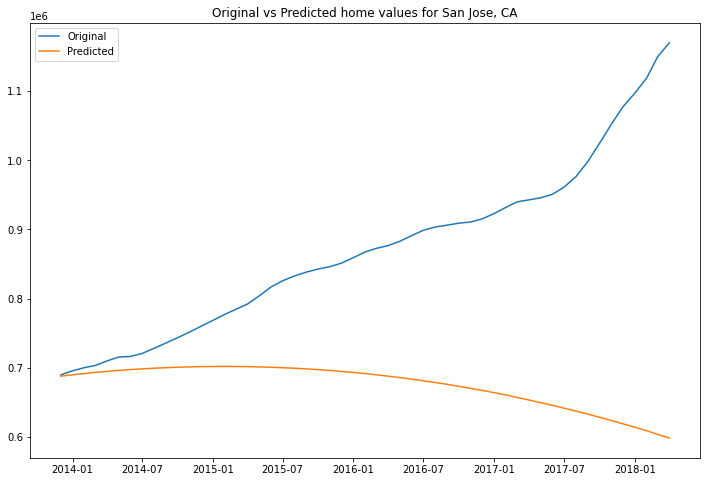

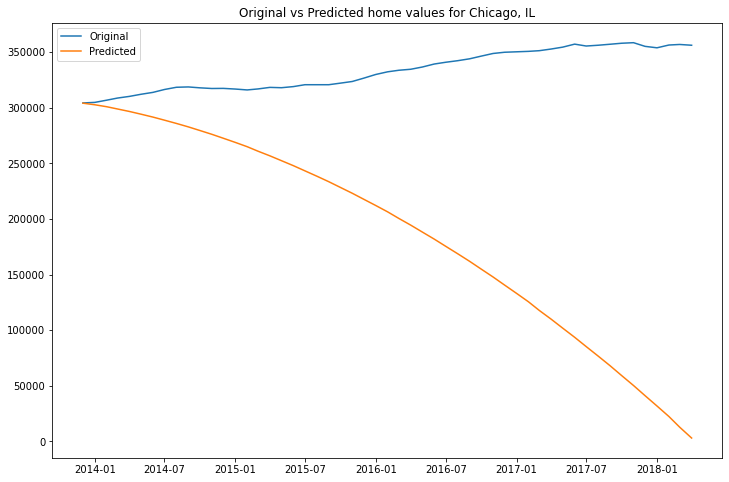

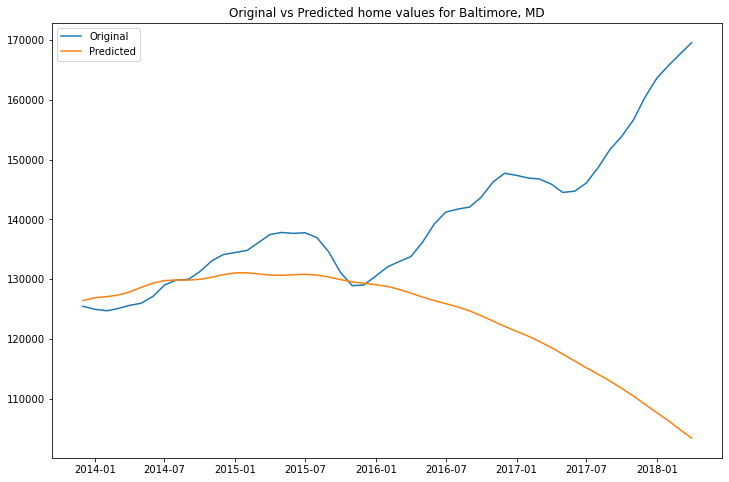

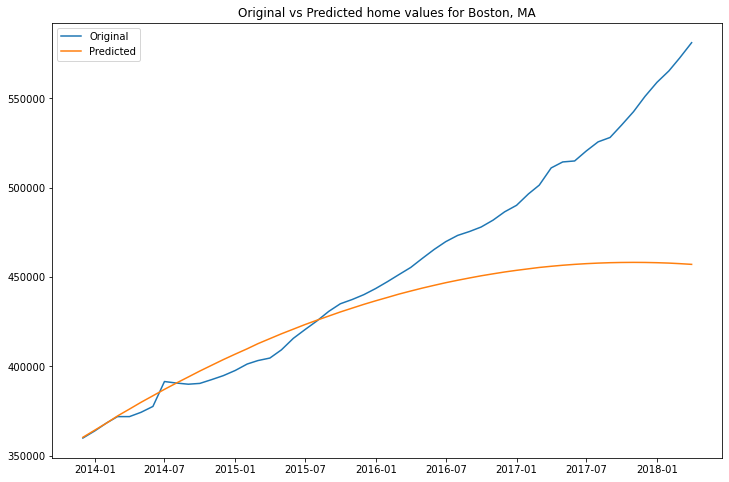

In [61]:
#3 good models
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 3,3,4)
    city_model.plot(test)

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:         Washington, DC   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1673.569
Date:                Wed, 11 May 2022   AIC                           3363.138
Time:                        13:21:05   BIC                           3389.876
Sample:                    04-01-1996   HQIC                          3373.948
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0833      0.557     -0.150      0.881      -1.176       1.009
ar.L2          0.4286      0.408      1.051      0.293      -0.371       1.228
ma.L1         -0.1038      0.557     -0.186      0.8

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           New York, NY   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1966.490
Date:                Wed, 11 May 2022   AIC                           3948.981
Time:                        13:21:06   BIC                           3975.720
Sample:                    04-01-1996   HQIC                          3959.791
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4683      0.828     -0.565      0.572      -2.091       1.155
ar.L2         -0.7648      0.791     -0.967      0.334      -2.315       0.786
ma.L1         -0.6130      0.833     -0.736      0.4

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Seattle, WA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1748.589
Date:                Wed, 11 May 2022   AIC                           3513.177
Time:                        13:21:09   BIC                           3539.916
Sample:                    04-01-1996   HQIC                          3523.988
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0360      0.147      0.244      0.807      -0.253       0.325
ar.L2         -0.8428      0.122     -6.907      0.000      -1.082      -0.604
ma.L1         -0.2640      0.151     -1.753      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Dallas, TX   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1545.654
Date:                Wed, 11 May 2022   AIC                           3107.308
Time:                        13:21:10   BIC                           3134.047
Sample:                    04-01-1996   HQIC                          3118.119
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7043      0.051    -13.903      0.000      -0.804      -0.605
ar.L2         -0.8968      0.042    -21.209      0.000      -0.980      -0.814
ma.L1          0.6252      0.053     11.795      0.0

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:        Los Angeles, CA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1925.593
Date:                Wed, 11 May 2022   AIC                           3867.186
Time:                        13:21:11   BIC                           3893.925
Sample:                    04-01-1996   HQIC                          3877.997
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7066      0.892     -1.914      0.056      -3.454       0.041
ar.L2         -0.9246      0.880     -1.051      0.293      -2.649       0.799
ma.L1          0.5833      0.897      0.650      0.5

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:            Chicago, IL   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1743.248
Date:                Wed, 11 May 2022   AIC                           3502.497
Time:                        13:21:14   BIC                           3529.236
Sample:                    04-01-1996   HQIC                          3513.307
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4146      0.332     -1.248      0.212      -1.066       0.237
ar.L2          0.4393      0.259      1.693      0.090      -0.069       0.948
ma.L1          0.0707      0.330      0.214      0.8

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:             Boston, MA   No. Observations:                  212
Model:                 ARIMA(2, 3, 5)   Log Likelihood               -1757.698
Date:                Wed, 11 May 2022   AIC                           3531.397
Time:                        13:21:15   BIC                           3558.135
Sample:                    04-01-1996   HQIC                          3542.207
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7921      0.692     -1.145      0.252      -2.147       0.563
ar.L2          0.0181      0.402      0.045      0.964      -0.769       0.805
ma.L1          0.3366      0.692      0.486      0.6

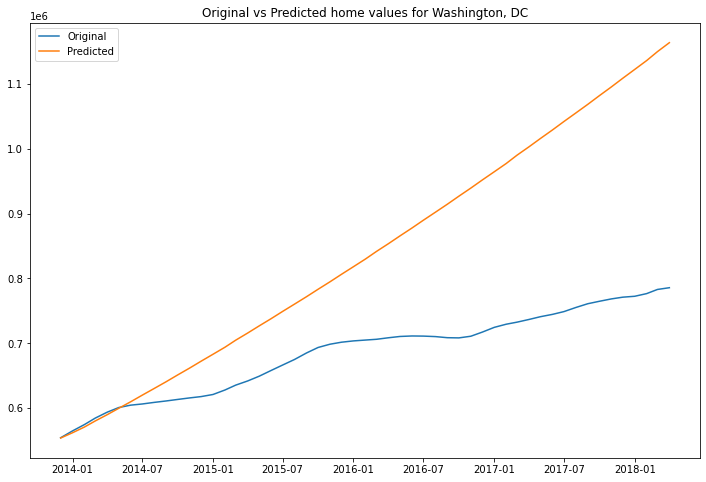

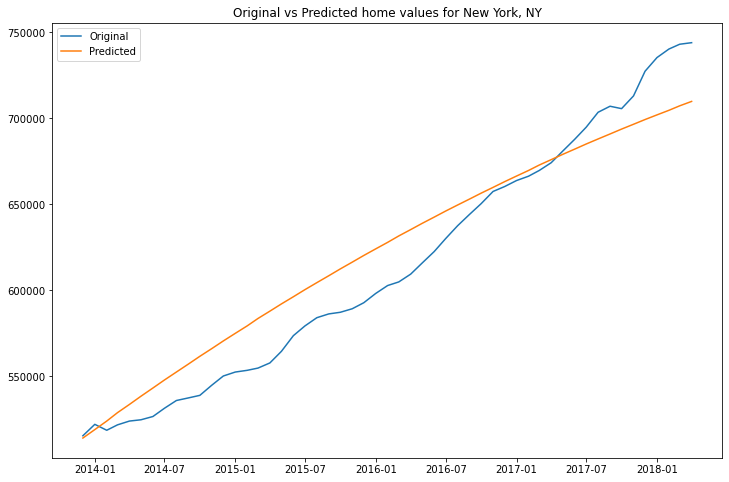

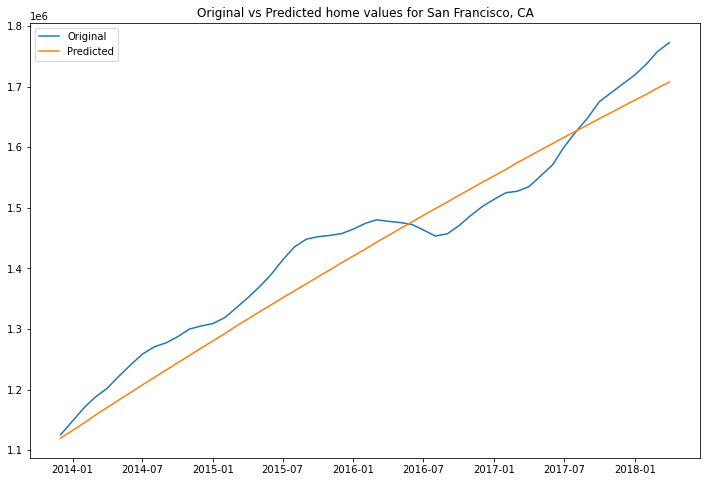

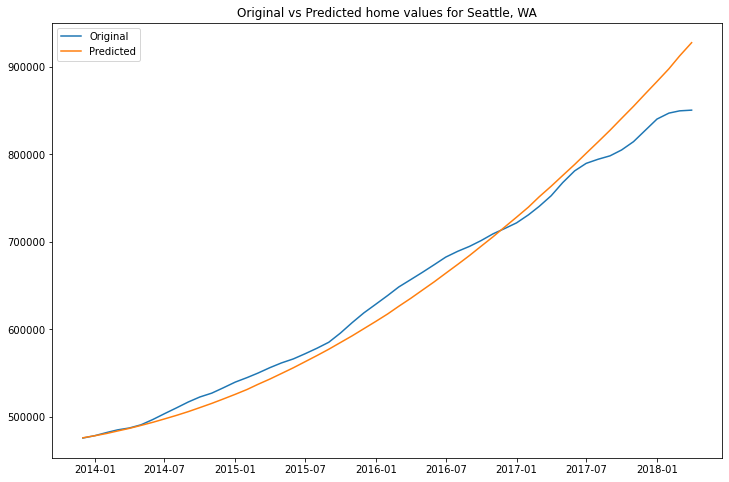

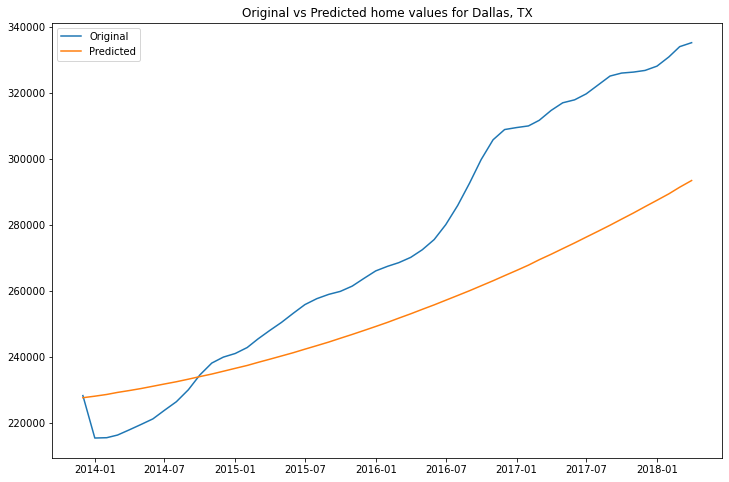

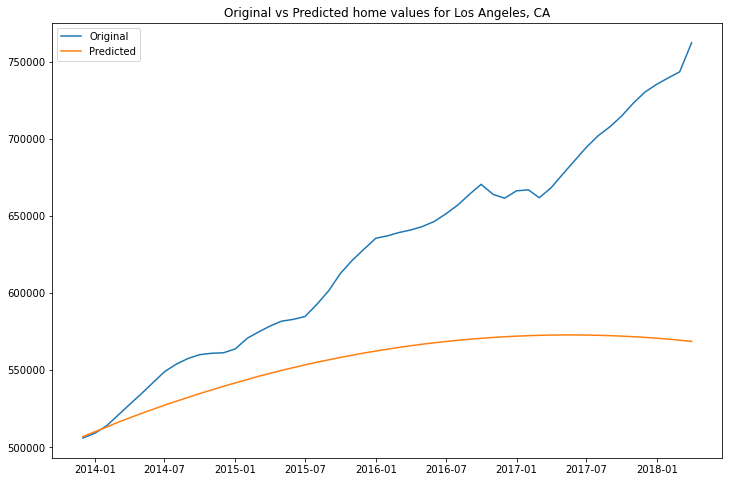

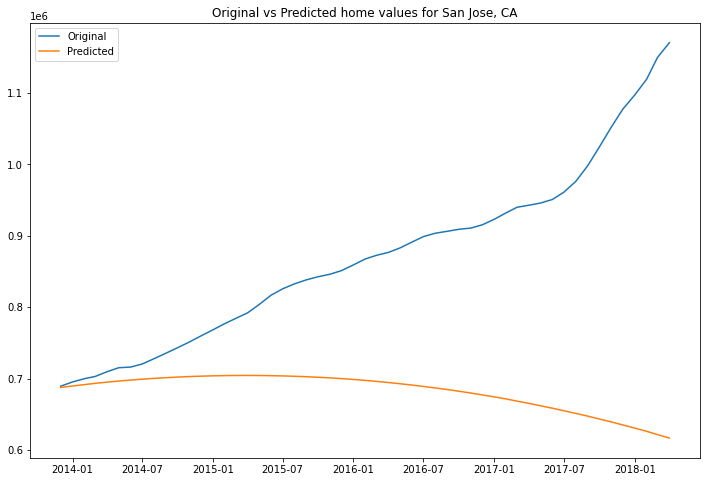

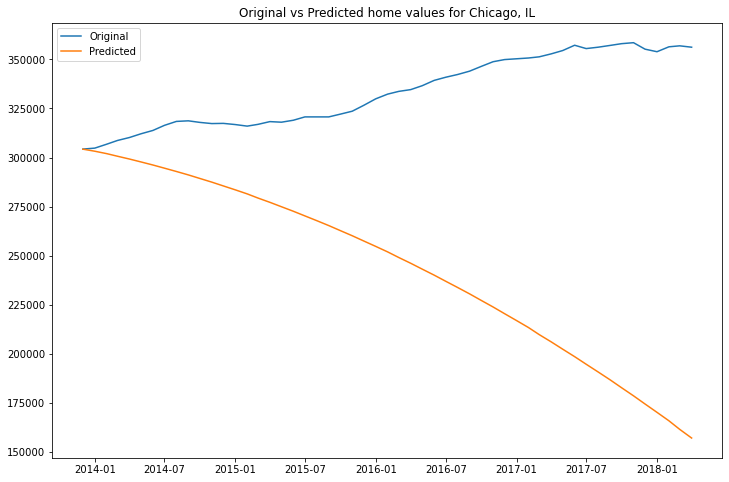

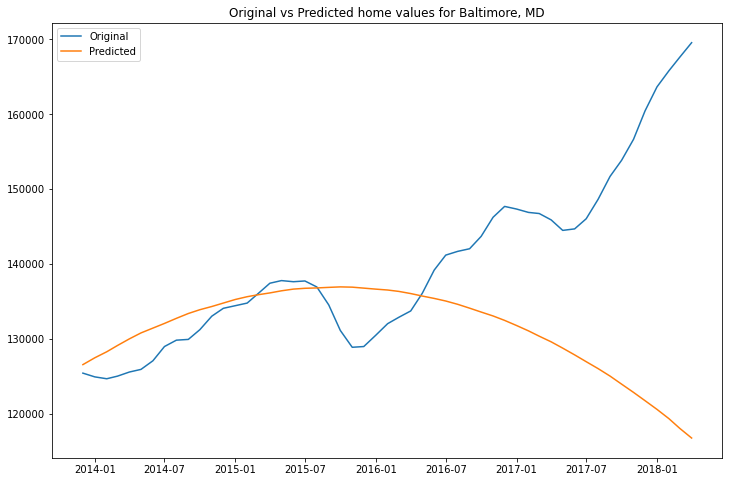

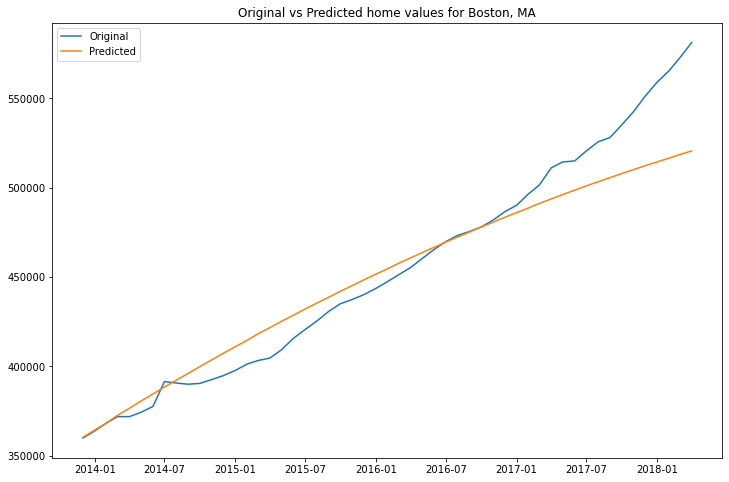

In [62]:
#Seattle works for this one.
for city in city_list:
    city_model = arima_mod(city)
    city_model.model(train, test, 2,3,5)
    city_model.plot(test)

In [64]:
forecast_mod = ARIMA(melted_df['Washington, DC'], order = [2,2,2]).fit()
forecasted_df = forecast_mod.forecast(steps=120)
forecasted_df

2018-05-01    7.882893e+05
2018-06-01    7.906829e+05
2018-07-01    7.930073e+05
2018-08-01    7.953428e+05
2018-09-01    7.977361e+05
2018-10-01    8.001905e+05
2018-11-01    8.026804e+05
2018-12-01    8.051731e+05
2019-01-01    8.076463e+05
2019-02-01    8.100948e+05
2019-03-01    8.125262e+05
2019-04-01    8.149536e+05
2019-05-01    8.173869e+05
2019-06-01    8.198299e+05
2019-07-01    8.222806e+05
2019-08-01    8.247342e+05
2019-09-01    8.271862e+05
2019-10-01    8.296346e+05
2019-11-01    8.320796e+05
2019-12-01    8.345231e+05
2020-01-01    8.369667e+05
2020-02-01    8.394117e+05
2020-03-01    8.418581e+05
2020-04-01    8.443052e+05
2020-05-01    8.467525e+05
2020-06-01    8.491993e+05
2020-07-01    8.516456e+05
2020-08-01    8.540914e+05
2020-09-01    8.565372e+05
2020-10-01    8.589831e+05
2020-11-01    8.614292e+05
2020-12-01    8.638755e+05
2021-01-01    8.663219e+05
2021-02-01    8.687682e+05
2021-03-01    8.712145e+05
2021-04-01    8.736606e+05
2021-05-01    8.761068e+05
2

Text(0.5, 1.0, 'Forecasted home values for Washington, DC')

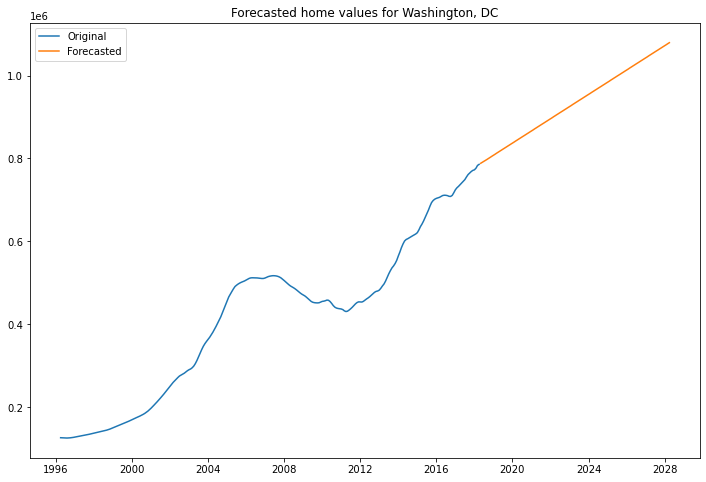

In [65]:
fig, ax = plt.subplots(figsize = (12,8)) 
ax.plot(melted_df['Washington, DC'])
ax.plot(forecasted_df)
ax.legend(['Original', 'Forecasted'])
ax.set_title(f'Forecasted home values for Washington, DC')

In [66]:
#We created an empty dictionary for our predictions 

predictions_dict = {}

#We are running a for-loop where we add the forecast to the dictionary, for every city.
for city in city_list: 
    forecast_mod = ARIMA(melted_df[city], order = [3,2,2]).fit()
    predictions_dict[city] = forecast_mod.forecast(steps=36)
    
predictions_dict    

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\hanis\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C

{'Washington, DC': 2018-05-01    788267.972361
 2018-06-01    790830.891633
 2018-07-01    793482.894939
 2018-08-01    796251.522242
 2018-09-01    799155.599047
 2018-10-01    802205.080373
 2018-11-01    805400.977672
 2018-12-01    808735.783060
 2019-01-01    812194.361988
 2019-02-01    815755.238707
 2019-03-01    819392.179158
 2019-04-01    823075.963758
 2019-05-01    826776.237373
 2019-06-01    830463.325375
 2019-07-01    834109.912603
 2019-08-01    837692.495559
 2019-09-01    841192.536073
 2019-10-01    844597.265810
 2019-11-01    847900.113906
 2019-12-01    851100.753290
 2020-01-01    854204.783533
 2020-02-01    857223.088133
 2020-03-01    860170.920908
 2020-04-01    863066.788896
 2020-05-01    865931.207303
 2020-06-01    868785.405366
 2020-07-01    871650.060581
 2020-08-01    874544.132966
 2020-09-01    877483.861355
 2020-10-01    880481.971032
 2020-11-01    883547.127150
 2020-12-01    886683.652296
 2021-01-01    889891.510310
 2021-02-01    893166.542

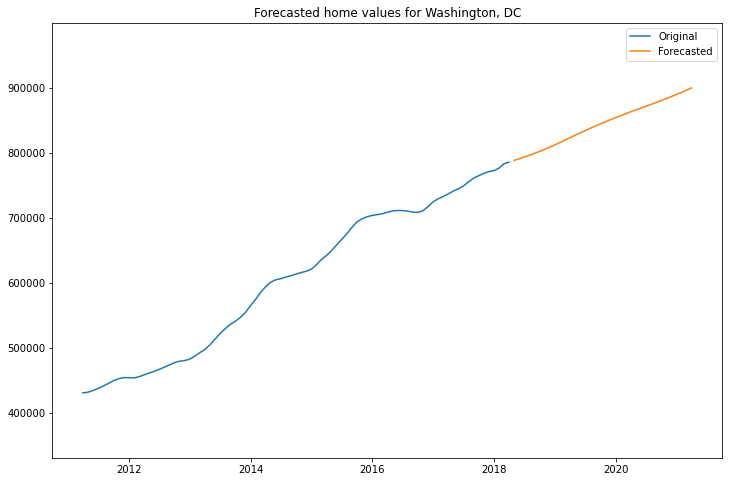

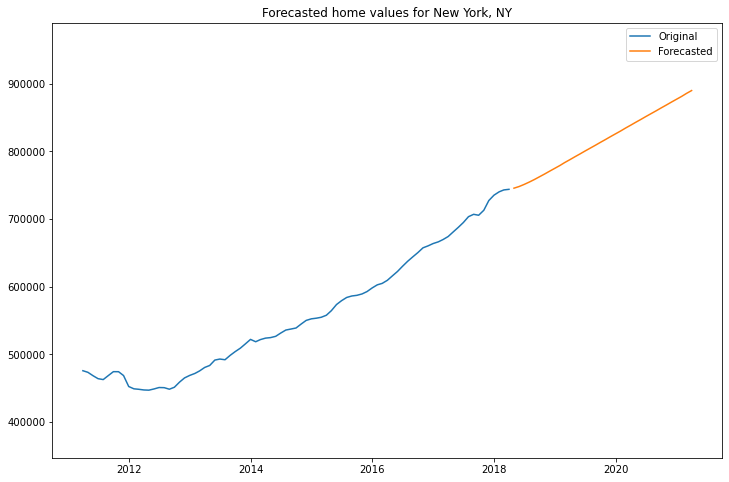

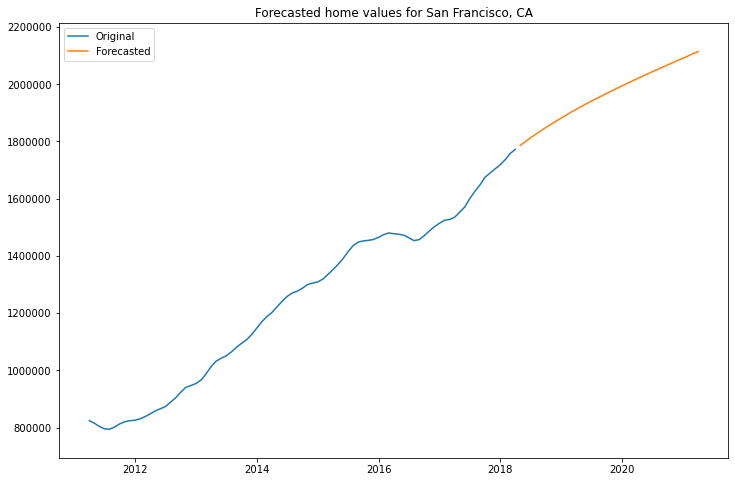

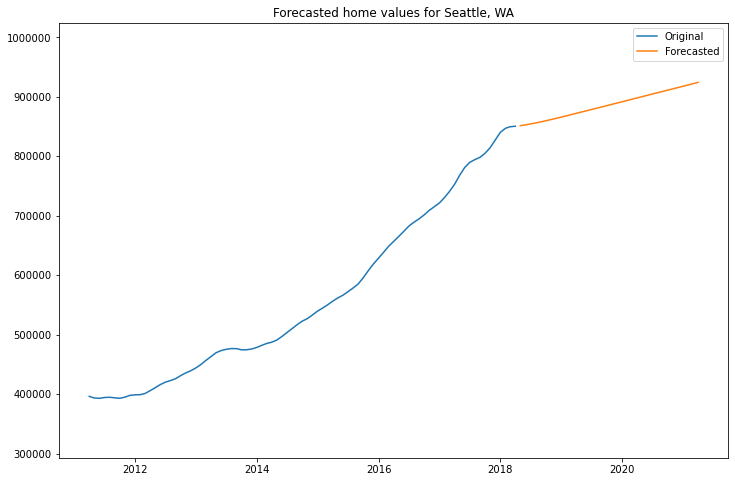

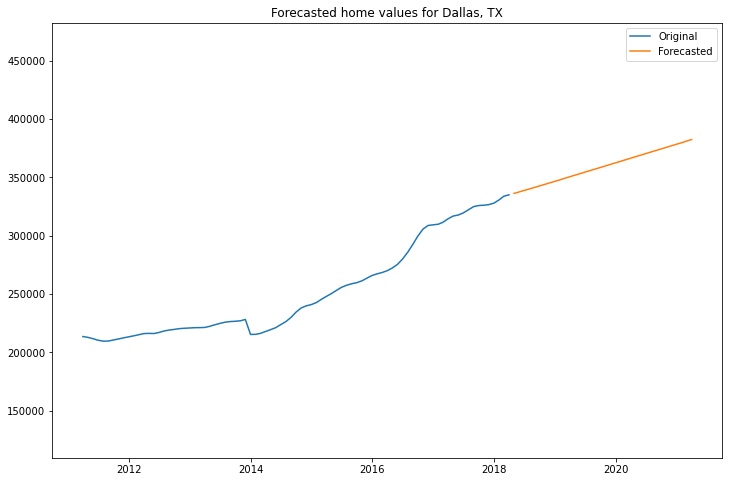

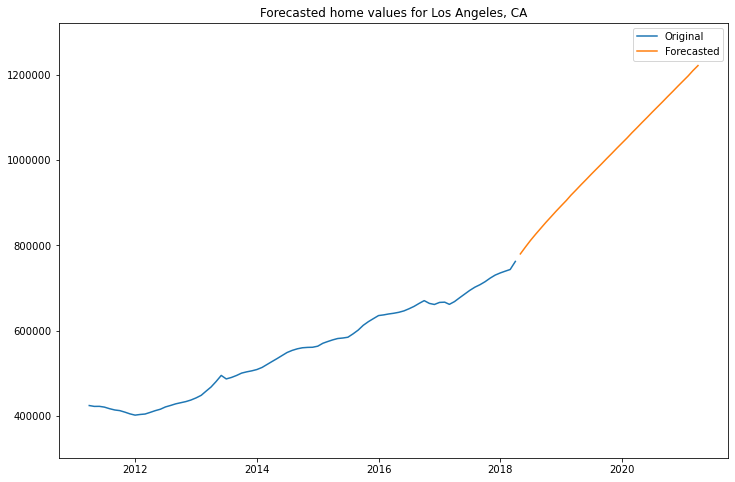

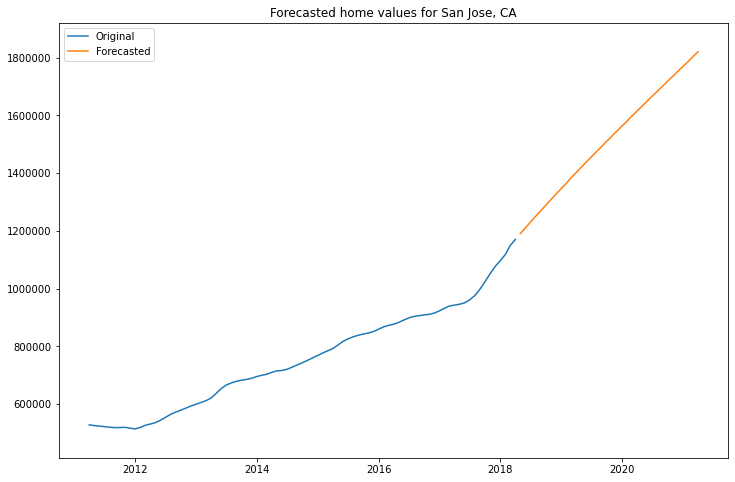

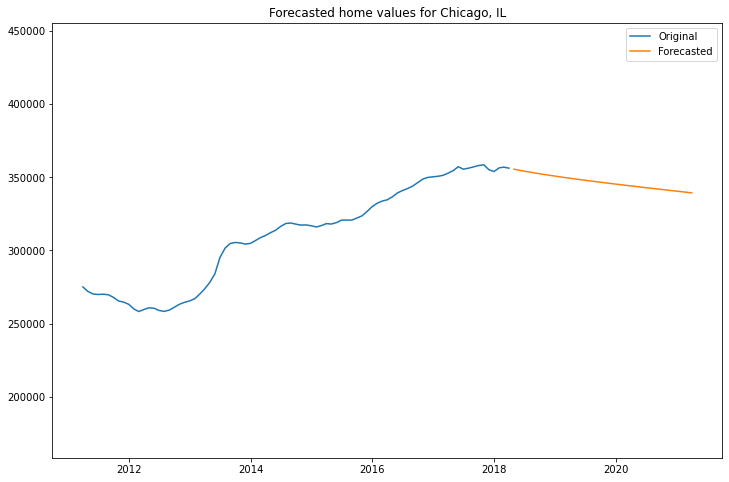

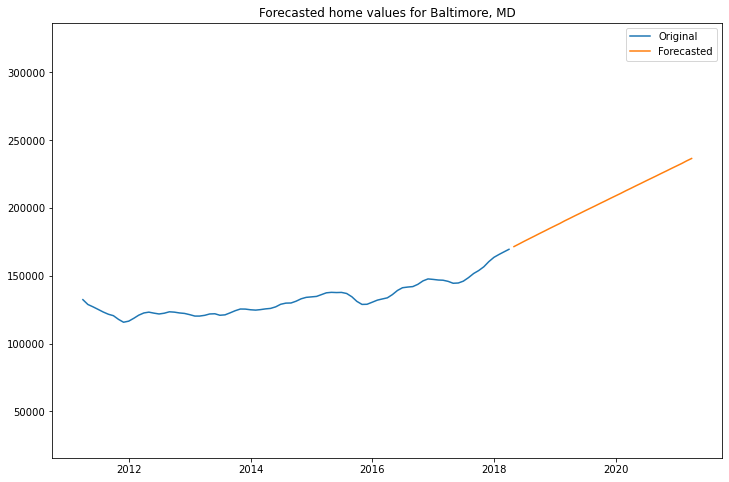

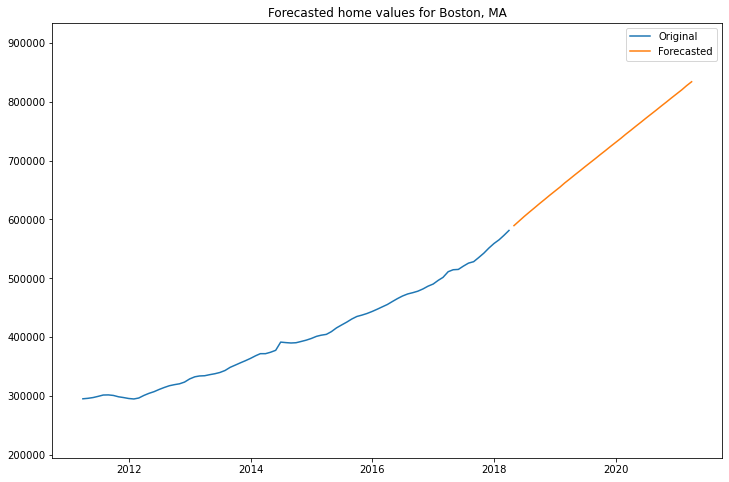

In [105]:
#We made a for loop that creates a graph that makes a prediction on home prices.


for city, predictions in predictions_dict.items():
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(melted_df[180:][city])
    ax.plot(predictions)
    ax.legend(['Original', 'Forecasted'])
    ax.set_title(f'Forecasted home values for {city}')
    ax.ticklabel_format(axis='y',style='plain')
    ax.set_ylim([min(melted_df[180:][city]-100000),max(predictions)+100000])
    plt.show()


In [117]:
predictions_dict['Washington, DC'][-1] - melted_df['Washington, DC'][-1] 

114133.84943663655

In [134]:
forcasted_return = {}
for city in city_list:
    forcast_return = ((predictions_dict[city][-1]/melted_df[city][-1])*100) -100
    forcasted_return[city]=forcast_return
    
forcasted_return = pd.DataFrame.from_dict(forcasted_return, orient='index')
forcasted_return.reset_index(inplace=True)
forcasted_return.rename({0:'Percent Return in 3 years','index':'City'},inplace=True, axis=1)
forcasted_return

City  Percent Return in 3 years
0     Washington, DC                  14.525466
1       New York, NY                  19.628649
2  San Francisco, CA                  19.282877
3        Seattle, WA                   8.674579
4         Dallas, TX                  14.137001
5    Los Angeles, CA                  60.205681
6       San Jose, CA                  55.574198
7        Chicago, IL                  -4.735584
8      Baltimore, MD                  39.517616
9         Boston, MA                  43.485599

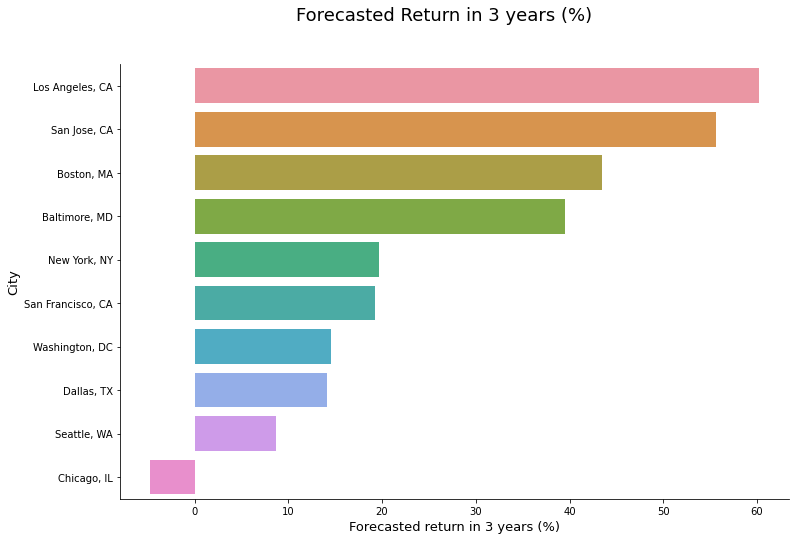

In [156]:
fig, ax = plt.subplots(figsize=(12,8))
forcasted_sort = forcasted_return.sort_values('Percent Return in 3 years',ascending = False)
sns.set_palette("husl")
sns.barplot(x='Percent Return in 3 years', y='City', data=forcasted_sort)
sns.despine()
fig.suptitle("Forecasted Return in 3 years (%)", fontsize = 18)
ax.set_xlabel("Forecasted return in 3 years (%)", fontsize = 13)
ax.set_ylabel("City", fontsize = 13)
plt.savefig('forecast_return.png', transparent=True,bbox_inches="tight", dpi=500)